In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from scipy.interpolate import interp1d
import matplotlib.cm as cm
from salishsea_tools import (nc_tools, gsw_calls, geo_tools, viz_tools)
import seabird
import cmocean as cmo
from datetime import (
    datetime,
    timedelta,
)
from matplotlib.dates import date2num, DateFormatter

import pandas as pd

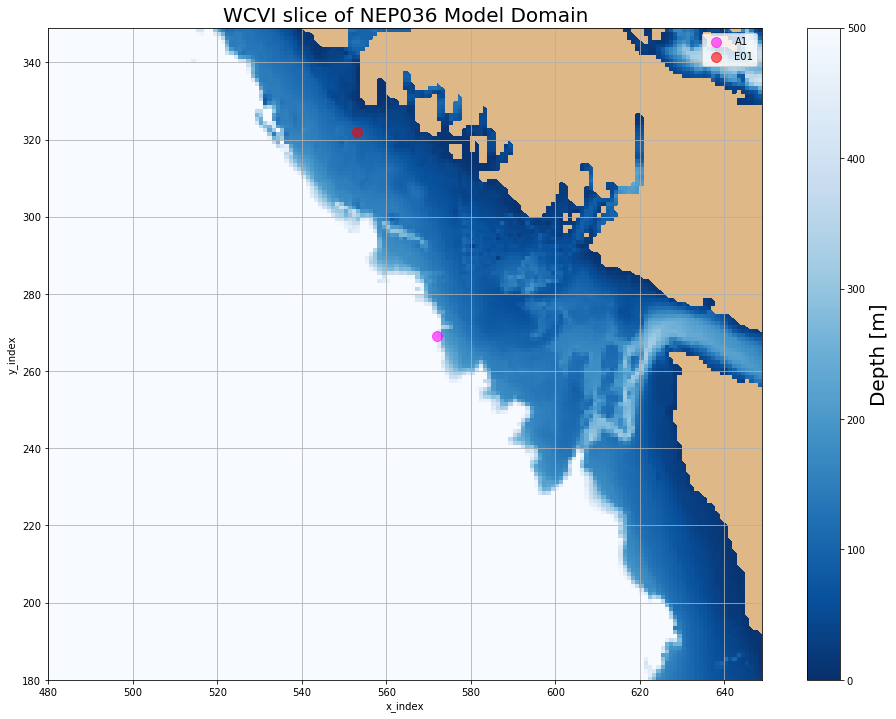

In [2]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')


Z = bathy.variables['Bathymetry']

y_wcvi_slice = np.arange(180,350)
x_wcvi_slice = np.arange(480,650)



lon_model = bathy['nav_lon'][...]
lat_model = bathy['nav_lat'][...]


cmap = plt.get_cmap('Blues_r')

cmap.set_bad('burlywood')
fig, ax = plt.subplots(1, 1, figsize=(16,12)); ax.grid()
p = ax.pcolormesh(x_wcvi_slice,y_wcvi_slice,Z[y_wcvi_slice,x_wcvi_slice], cmap=cmap, vmin=0, vmax=500)




lon_A1 = -126.20433
lat_A1 = 48.52958

j, i = geo_tools.find_closest_model_point(lon_A1,lat_A1,\
                                          lon_model,lat_model,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})      
ax.scatter(i, j, c='magenta', s=100, alpha=0.6, label = 'A1')

lon_E01 = -126.60397
lat_E01 = 49.28883

y, x = geo_tools.find_closest_model_point(lon_E01,lat_E01,\
                                          lon_model,lat_model,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})
ax.scatter(x, y, c='red', s=100, alpha=0.6, label = 'E01')

legend = ax.legend(loc='best', fancybox=True, framealpha=0.8)
ax.set_xlabel('x_index')
ax.set_ylabel('y_index')
ax.set_title('WCVI slice of NEP036 Model Domain', fontsize=20)
viz_tools.plot_land_mask(ax, bathy, yslice=y_wcvi_slice, xslice=x_wcvi_slice, color='burlywood')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.set_ylabel('Depth [m]', fontsize=20)
ax.grid()


In [3]:
A1_data = pd.read_table('/data/ssahu/IOS_data/ADCP_E1_A1/a1_20150803_20160713_0493m.csv',delim_whitespace=1,header = None, skiprows=426)

str_stuff = np.array(['Record_Number', 'Date', 'Time', 'Pitch', 'Roll', 'Heading', 'Pressure', 'Temperature'], dtype = 'str')

bin_depths = np.array([84.44, 100.44, 116.44, 132.44, 148.44, 164.44, 180.44, 196.44, 212.44, 228.44, 244.44, 260.44, 276.44\
              , 292.44, 308.44, 324.44, 340.44, 356.44, 372.44, 388.44, 404.44, 420.44, 436.44, 452.44, 468.44], dtype = 'str')

variables = np.array(['vel_north', 'vel_east', 'vel_vert', 'back_scatter_mean'], dtype = 'str')

column_data = []

for j in bin_depths:
    for i in variables:
        column_data = np.append(arr=column_data, values=i+'_'+j)
    

columns_A1 = np.concatenate((str_stuff, column_data), axis = 0)

A1_data.columns = columns_A1

In [4]:
A1_data.tail(10)

Record_Number        Date      Time  Pitch  Roll  Heading  Pressure  \
16545        16546.0  2016/07/13  12:20:51  -1.24  0.26   130.44   509.115   
16546        16547.0  2016/07/13  12:50:51  -1.09  0.27   131.50   507.959   
16547        16548.0  2016/07/13  13:20:51  -0.99  0.26   132.24   509.217   
16548        16549.0  2016/07/13  13:50:51  -0.87  0.20   133.02   508.788   
16549        16550.0  2016/07/13  14:20:51  -0.76  0.17   133.00   509.021   
16550        16551.0  2016/07/13  14:50:51  -0.68  0.19   133.81   508.602   
16551        16552.0  2016/07/13  15:20:51  -0.58  0.15   134.78   508.941   
16552        16553.0  2016/07/13  15:50:51  -0.48  0.10   134.73   508.218   
16553        16554.0  2016/07/13  16:20:51  -0.40 -0.04   134.00   508.507   
16554        16555.0  2016/07/13  16:50:51  -0.45 -0.08   134.39   507.680   

       Temperature  vel_north_84.44  vel_east_84.44            ...             \
16545         4.77        -0.111931       -0.130940            ...              
16546         4.80        -0.017603       -0.284218            ...              
16547         4.74        -0.038412       -0.270654            ...              
16548         4.78         0.017074       -0.177647            ...              
16549         4.80        -0.004040       -0.208047            ...              
16550         4.85         0.097454       -0.187850            ...              
16551         4.78         0.085985       -0.201759            ...              
16552         4.77         0.038568       -0.145043            ...              
16553         4.75         0.057352       -0.096544            ...              
16554         4.74         0.041385       -0.112855            ...              

       vel_vert_436.44  back_scatter_mean_436.44  vel_north_452.44  \
16545            0.003                    192.25         -0.002802   
16546           -0.002                    194.25         -0.067592   
16547           -0.010                    191.50         -0.079873   
16548           -0.008                    196.25         -0.008868   
16549            0.001                    193.25          0.009429   
16550           -0.001                    194.00         -0.016437   
16551            0.003                    194.00          0.018009   
16552           -0.007                    192.75          0.022904   
16553            0.003                    195.75         -0.000687   
16554            0.005                    195.25         -0.022814   

       vel_east_452.44  vel_vert_452.44  back_scatter_mean_452.44  \
16545         0.068097            0.004                    200.25   
16546         0.037045            0.000                    202.50   
16547        -0.005313           -0.016                    199.50   
16548        -0.022525           -0.009                    199.50   
16549        -0.024312            0.000                    202.50   
16550        -0.021676            0.005                    202.00   
16551        -0.000830           -0.004                    199.50   
16552        -0.006665           -0.004                    200.25   
16553         0.009194            0.003                    201.00   
16554         0.009826           -0.005                    204.25   

       vel_north_468.44  vel_east_468.44  vel_vert_468.44  \
16545         -0.010748         0.011379            0.009   
16546         -0.041978         0.014485            0.000   
16547         -0.079060        -0.032226           -0.020   
16548         -0.086466        -0.014615           -0.018   
16549         -0.050972        -0.045682            0.000   
16550          0.045283         0.012627            0.007   
16551          0.008111        -0.037245           -0.002   
16552          0.011687        -0.000650           -0.012   
16553          0.019273        -0.011939           -0.002   
16554         -0.020917         0.020844           -0.011   

       back_scatter_mean_468.44  
16545              

In [5]:
vel_north_84 = np.array(A1_data['vel_north_84.44'], dtype = np.float)[:4320]
vel_east_84  = np.array(A1_data['vel_east_84.44'], dtype = np.float)[:4320]
mag_84       = np.sqrt(vel_east_84**2,vel_north_84**2)

vel_north_148 = np.array(A1_data['vel_north_148.44'], dtype = np.float)[:4320]
vel_east_148  = np.array(A1_data['vel_east_148.44'], dtype = np.float)[:4320]
mag_148       = np.sqrt(vel_east_148**2,vel_north_148**2)

vel_north_196 = np.array(A1_data['vel_north_196.44'], dtype = np.float)[:4320]
vel_east_196  = np.array(A1_data['vel_east_196.44'], dtype = np.float)[:4320]
mag_196      = np.sqrt(vel_east_196**2,vel_north_196**2)

vel_north_228 = np.array(A1_data['vel_north_228.44'], dtype = np.float)[:4320]
vel_east_228 = np.array(A1_data['vel_east_228.44'], dtype = np.float)[:4320]
mag_228      = np.sqrt(vel_east_228**2,vel_north_228**2)

vel_north_260 = np.array(A1_data['vel_north_260.44'], dtype = np.float)[:4320]
vel_east_260 = np.array(A1_data['vel_east_260.44'], dtype = np.float)[:4320]
mag_260      = np.sqrt(vel_east_260**2,vel_north_260**2)

In [6]:
tarikh = np.array(A1_data['Date'], dtype = np.str)
samai  = np.array(A1_data['Time'], dtype = np.str)

time = np.empty_like(tarikh)

for i in np.arange(tarikh.shape[0]):
    time[i] = tarikh[i] + '' + samai[i]


datetime_A1 = np.empty_like(time)

for i in np.arange(datetime_A1.shape[0]):
    datetime_A1[i] = datetime.strptime(time[i], '%Y/%m/%d%H:%M:%S')
    
datetime_A1 = datetime_A1.astype(np.datetime64)


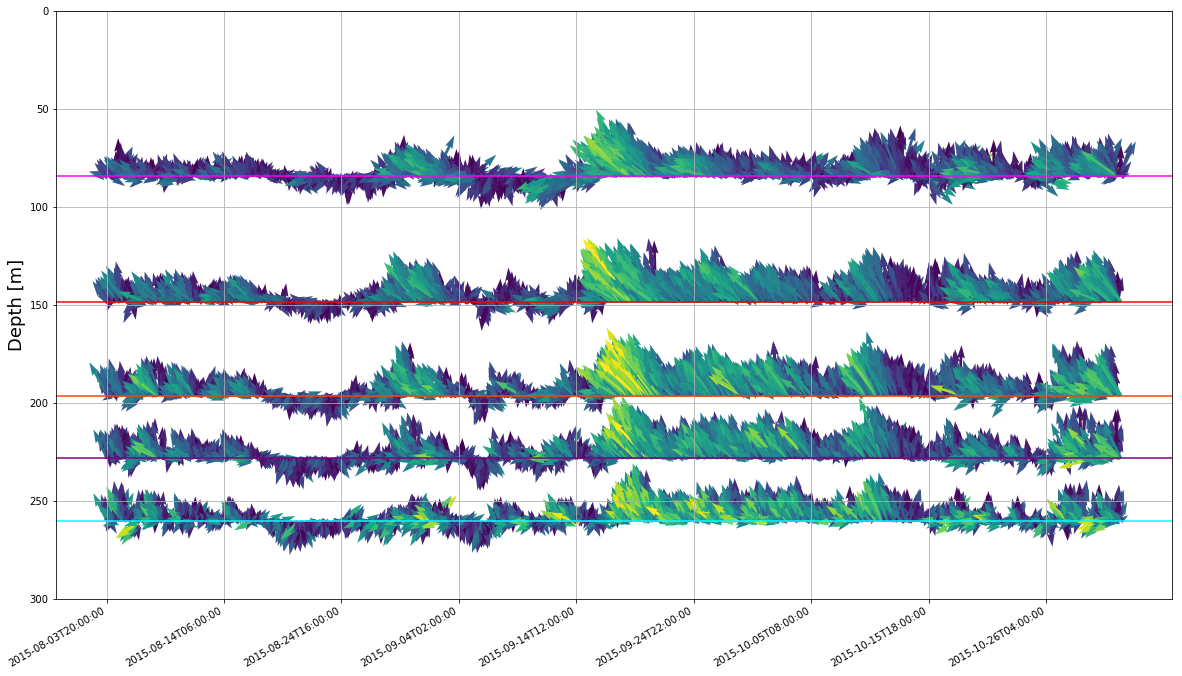

In [8]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)





time_axis = datetime_A1[:4320]
time_tick = time_axis[::step]
time_axis_quiver = np.arange(0,4320,step)



fig, ax = plt.subplots(1, 1, figsize=(20,12))


ax.quiver(time_axis_quiver, 84.44, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=84.44, color='magenta', label = '84 m')

ax.quiver(time_axis_quiver, 148.44, vel_east_148[::step], vel_north_148[::step], mag_148[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=148.44, color='red', label = '148 m')

ax.quiver(time_axis_quiver, 196.44, vel_east_196[::step], vel_north_196[::step], mag_196[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=196.44, color='orangered', label = '196 m')

ax.quiver(time_axis_quiver, 260.44, vel_east_260[::step], vel_north_260[::step], mag_260[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=260.44, color='cyan', label = '196 m')

ax.quiver(time_axis_quiver, 228.44, vel_east_228[::step], vel_north_228[::step], mag_228[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=228.44, color='purple', label = '228 m')

ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::500], time_tick[::500])
ax.format_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(0, 300)
ax.invert_yaxis()
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

In [9]:
vel_north_84 = np.array(A1_data['vel_north_84.44'], dtype = np.float)[:2420]
vel_east_84  = np.array(A1_data['vel_east_84.44'], dtype = np.float)[:2420]
mag_84       = np.sqrt(vel_east_84**2,vel_north_84**2)

vel_north_148 = np.array(A1_data['vel_north_148.44'], dtype = np.float)[:2420]
vel_east_148  = np.array(A1_data['vel_east_148.44'], dtype = np.float)[:2420]
mag_148       = np.sqrt(vel_east_148**2,vel_north_148**2)

vel_north_196 = np.array(A1_data['vel_north_196.44'], dtype = np.float)[:2420]
vel_east_196  = np.array(A1_data['vel_east_196.44'], dtype = np.float)[:2420]
mag_196      = np.sqrt(vel_east_196**2,vel_north_196**2)

vel_north_228 = np.array(A1_data['vel_north_228.44'], dtype = np.float)[:2420]
vel_east_228 = np.array(A1_data['vel_east_228.44'], dtype = np.float)[:2420]
mag_228      = np.sqrt(vel_east_228**2,vel_north_228**2)

vel_north_260 = np.array(A1_data['vel_north_260.44'], dtype = np.float)[:2420]
vel_east_260 = np.array(A1_data['vel_east_260.44'], dtype = np.float)[:2420]
mag_260      = np.sqrt(vel_east_260**2,vel_north_260**2)

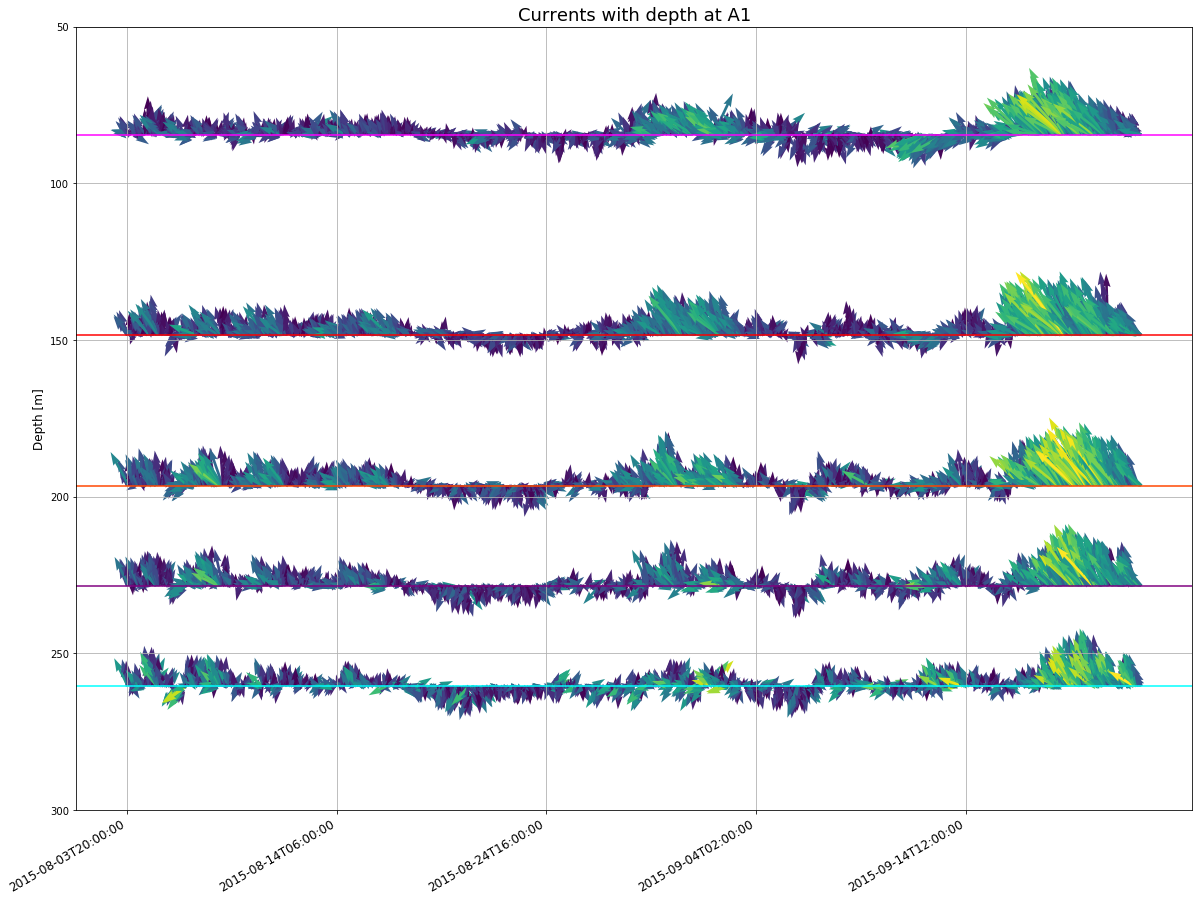

In [10]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)





time_axis = datetime_A1[:2420]
time_tick = time_axis[::step]
time_axis_quiver = np.arange(0,2420,step)



fig, ax = plt.subplots(1, 1, figsize=(20,16))


ax.quiver(time_axis_quiver, 84.44, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=84.44, color='magenta', label = '84 m')

ax.quiver(time_axis_quiver, 148.44, vel_east_148[::step], vel_north_148[::step], mag_148[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=148.44, color='red', label = '148 m')

ax.quiver(time_axis_quiver, 196.44, vel_east_196[::step], vel_north_196[::step], mag_196[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=196.44, color='orangered', label = '196 m')

ax.quiver(time_axis_quiver, 260.44, vel_east_260[::step], vel_north_260[::step], mag_260[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=260.44, color='cyan', label = '196 m')

ax.quiver(time_axis_quiver, 228.44, vel_east_228[::step], vel_north_228[::step], mag_228[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=228.44, color='purple', label = '228 m')

ax.set_ylabel('Depth [m]', fontsize =12)
plt.xticks(time_axis_quiver[::500], time_tick[::500], fontsize =12)
ax.format_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(50, 300)
ax.invert_yaxis()
ax.set_title('Currents with depth at A1', fontsize =18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

In [8]:
def U_timeseries_at_WCVI_locations(grid_U):
    u_vel = grid_U.variables['uo'][0,:, y_wcvi_slice[:], x_wcvi_slice[:]]
    
    vector_u = namedtuple('vector_u', 'u_vel')

    return vector_u(u_vel)


def V_timeseries_at_WCVI_locations(grid_V):
    
    v_vel = grid_V.variables['vo'][0,:, y_wcvi_slice[:], x_wcvi_slice[:]]
    
    vector_v = namedtuple('vector_v', 'v_vel')

    return vector_v(v_vel)

In [4]:
bathy = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/Bathymetry_EastCoast_NEMO_R036_GEBCO_corr_v14.nc')

mesh_mask = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/INV/mesh_mask.nc')

mbathy = mesh_mask['mbathy'][0,...]

Z = bathy.variables['Bathymetry'][:]

y_wcvi_slice = np.arange(180,350)
x_wcvi_slice = np.arange(480,650)

zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht']


lon = bathy['nav_lon'][...]
lat = bathy['nav_lat'][...]


short_NEP_iso_jul = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/short_slice_NEP36_jul_along_isopycnal_larger_offshore_rho_correct.nc')

short_spic_iso_jul = short_NEP_iso_jul.variables['spiciness']
short_iso_t = short_NEP_iso_jul.variables['isot']


short_NEP_iso_aug = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/short_NEP36_aug_along_isopycnal_larger_offahore_rho_correct.nc')

short_spic_iso_aug = short_NEP_iso_aug.variables['spiciness']
short_iso_t = short_NEP_iso_aug.variables['isot']


short_NEP_iso_jun = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/short_NEP36_june_along_isopycnal_larger_offshore_rho_correct.nc')

short_spic_iso_jun = short_NEP_iso_jun.variables['spiciness']
short_iso_t = short_NEP_iso_jun.variables['isot']

lon_spic_file = lon[180:350,480:650]
lat_spic_file = lat[180:350,480:650]


lon_A1 = -126.20433
lat_A1 = 48.52958

j, i = geo_tools.find_closest_model_point(lon_A1,lat_A1,\
                                          lon_spic_file,lat_spic_file,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}}) 

lon_E01 = -126.60397
lat_E01 = 49.28883

y, x = geo_tools.find_closest_model_point(lon_E01,lat_E01,\
                                          lon_spic_file,lat_spic_file,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}}) 


In [8]:
NEP_Jun_u = nc.Dataset('/data/ssahu/NEP36_Extracted_Months/')

OSError: NetCDF: Unknown file format

In [9]:

spic_A1_jun_26_4 = short_spic_iso_jun[:,4,j,i]

spic_A1_jul_26_4 = short_spic_iso_jul[:,4,j,i]

spic_A1_aug_26_4 = short_spic_iso_aug[:,4,j,i]

spic_3_months_A1_26_4 = np.concatenate((spic_A1_jun_26_4, spic_A1_jul_26_4, spic_A1_aug_26_4), axis = 0)


spic_A1_jun_26_3 = short_spic_iso_jun[:,3,j,i]

spic_A1_jul_26_3 = short_spic_iso_jul[:,3,j,i]

spic_A1_aug_26_3 = short_spic_iso_aug[:,3,j,i]

spic_3_months_A1_26_3 = np.concatenate((spic_A1_jun_26_3, spic_A1_jul_26_3, spic_A1_aug_26_3), axis =0)


date1 = '2015-06-01'
date2 = '2015-08-31'
mydates = np.array(pd.date_range(date1, date2))

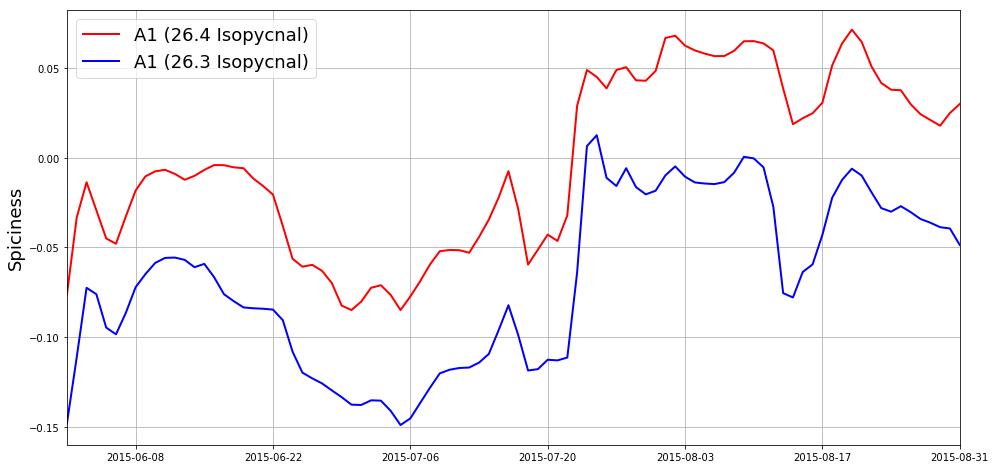

In [42]:

 
# Make plots
fig, (ax) = plt.subplots(1, 1, figsize=(16,8))
ax.plot(mydates , spic_3_months_A1_26_4, 'r-',linewidth=2, label = 'A1 (26.4 Isopycnal)')
ax.plot(mydates , spic_3_months_A1_26_3, 'b-',linewidth=2, label = 'A1 (26.3 Isopycnal)')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.set_ylabel('Spiciness', fontsize =18)
ax.set_xlim(mydates[0],mydates[-1])
#ax.set_xticklabels(date_time[3600:6808])
# ax2.set_ylim(-12,10)
ax.grid() 





In [43]:
lat_LB08 = 48.4217
lon_LB08 = -125.4775

j, i = geo_tools.find_closest_model_point(lon_LB08,lat_LB08,\
                                                  lon_spic_file,lat_spic_file,tols=\
                                                  {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},'\
                                                  GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}})

print(j,i)

84 119


In [44]:

spic_A1_jun_26_4 = short_spic_iso_jun[:,4,j,i]

spic_A1_jul_26_4 = short_spic_iso_jul[:,4,j,i]

spic_A1_aug_26_4 = short_spic_iso_aug[:,4,j,i]

spic_3_months_A1_26_4 = np.concatenate((spic_A1_jun_26_4, spic_A1_jul_26_4, spic_A1_aug_26_4), axis = 0)


spic_A1_jun_26_3 = short_spic_iso_jun[:,3,j,i]

spic_A1_jul_26_3 = short_spic_iso_jul[:,3,j,i]

spic_A1_aug_26_3 = short_spic_iso_aug[:,3,j,i]

spic_3_months_A1_26_3 = np.concatenate((spic_A1_jun_26_3, spic_A1_jul_26_3, spic_A1_aug_26_3), axis =0)


date1 = '2015-06-01'
date2 = '2015-08-31'
mydates = np.array(pd.date_range(date1, date2))

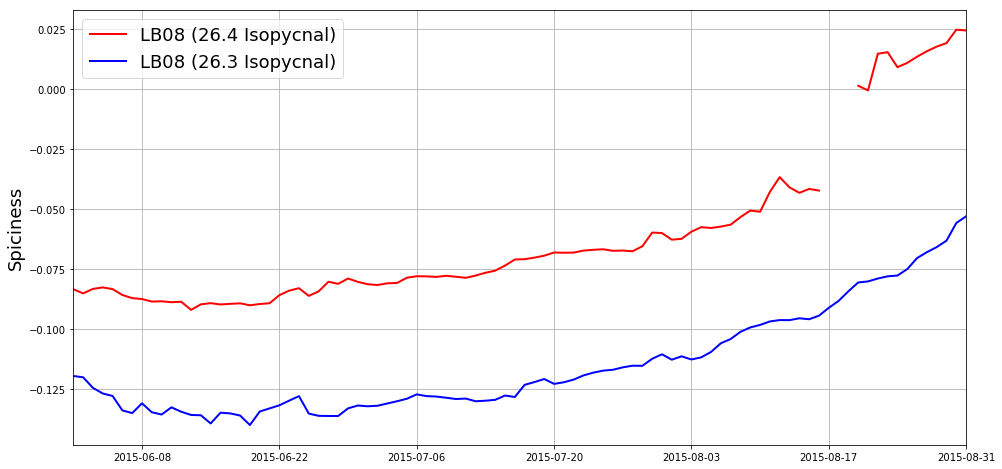

In [45]:

 
# Make plots
fig, (ax) = plt.subplots(1, 1, figsize=(16,8))
ax.plot(mydates , spic_3_months_A1_26_4, 'r-',linewidth=2, label = 'LB08 (26.4 Isopycnal)')
ax.plot(mydates , spic_3_months_A1_26_3, 'b-',linewidth=2, label = 'LB08 (26.3 Isopycnal)')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.set_ylabel('Spiciness', fontsize =18)
ax.set_xlim(mydates[0],mydates[-1])
#ax.set_xticklabels(date_time[3600:6808])
# ax2.set_ylim(-12,10)
ax.grid() 





In [3]:
A1_data = pd.read_table('/data/ssahu/IOS_data/ADCP_E1_A1/e01_20150801_20160712_0091m.csv',delim_whitespace=1,header = None, skiprows=426)

str_stuff = np.array(['Record_Number', 'Date', 'Time', 'Pitch', 'Roll', 'Heading', 'Pressure', 'Temperature'], dtype = 'str')

bin_depths = np.array([12.95, 16.95, 20.95, 24.95, 28.95, 32.95, 36.95, 40.95, 44.95, 48.95, 52.95, 56.95, 60.95\
                       , 64.95, 68.95, 72.95, 76.95, 80.95, 84.95], dtype = 'str')

variables = np.array(['vel_north', 'vel_east', 'vel_vert', 'back_scatter_mean'], dtype = 'str')

column_data = []

for j in bin_depths:
    for i in variables:
        column_data = np.append(arr=column_data, values=i+'_'+j)
    

columns_A1 = np.concatenate((str_stuff, column_data), axis = 0)

A1_data.columns = columns_A1

In [8]:
A1_data.tail(10)

Record_Number        Date      Time  Pitch  Roll  Heading  Pressure  \
16537        16607.0  2016/07/12  16:00:00  -1.20  0.49   310.64    93.331   
16538        16608.0  2016/07/12  16:30:00  -1.23  0.40   310.80    93.267   
16539        16609.0  2016/07/12  17:00:00  -1.39  0.30   300.32    93.137   
16540        16610.0  2016/07/12  17:30:00  -1.52  0.12   304.95    93.027   
16541        16611.0  2016/07/12  18:00:00  -1.71 -0.08   306.59    92.874   
16542        16612.0  2016/07/12  18:30:00  -1.76 -0.15   309.55    92.737   
16543        16613.0  2016/07/12  19:00:00  -1.86 -0.19   311.20    92.598   
16544        16614.0  2016/07/12  19:30:00  -2.04 -0.39   311.68    92.476   
16545        16615.0  2016/07/12  20:00:00  -2.14 -0.35   314.96    92.394   
16546        16616.0  2016/07/12  20:30:00  -2.17 -0.47   317.79    92.353   

       Temperature  vel_north_12.95  vel_east_12.95           ...             \
16537         7.15         0.185976       -0.275583           ...              
16538         7.14         0.226347       -0.267385           ...              
16539         7.14         0.223301       -0.301791           ...              
16540         7.13         0.204358       -0.274129           ...              
16541         7.13         0.158926       -0.269235           ...              
16542         7.15         0.162139       -0.293353           ...              
16543         7.19         0.203530       -0.295303           ...              
16544         7.21         0.198023       -0.287578           ...              
16545         7.23         0.162368       -0.283869           ...              
16546         7.24         0.189355       -0.279776           ...              

       vel_vert_76.95  back_scatter_mean_76.95  vel_north_80.95  \
16537          -0.001                   112.00         0.064708   
16538          -0.003                   113.50         0.055390   
16539           0.000                   115.50         0.055644   
16540           0.000                   116.25         0.037708   
16541          -0.003                   116.50         0.031768   
16542          -0.005                   115.00         0.027357   
16543          -0.001                   111.50         0.029767   
16544           0.000                   112.00         0.075963   
16545           0.000                   111.25         0.069207   
16546          -0.005                   109.50         0.054368   

       vel_east_80.95  vel_vert_80.95  back_scatter_mean_80.95  \
16537       -0.149602           0.000                   121.25   
16538       -0.129449          -0.003                   122.75   
16539       -0.092762           0.000                   124.25   
16540       -0.088849          -0.001                   124.75   
16541       -0.072889          -0.003                   125.50   
16542       -0.072150          -0.005                   125.50   
16543       -0.090238          -0.002                   120.25   
16544       -0.063519           0.000                   120.25   
16545       -0.055131          -0.001                   120.00   
16546       -0.040854          -0.004                   119.75   

       vel_north_84.95  vel_east_84.95  vel_vert_84.95  \
16537         0.051731       -0.110697          -0.001   
16538         0.031513       -0.109576          -0.004   
16539         0.023584       -0.097364          -0.001   
16540        -0.003924       -0.109984           0.000   
16541         0.003291       -0.099404          -0.006   
16542         0.005942       -0.094407          -0.004   
16543         0.018358       -0.104197          -0.003   
16544         0.041264       -0.059517           0.000   
16545         0.019645       -0.064055           0.001   
16546         0.020461       -0.056483          -0.004   

       back_scatter_mean_84.95  
16537                   133.00  
16538                   132.75  
16539                   133.50  
16540                   134.25 

In [11]:
vel_north_12 = np.array(A1_data['vel_north_12.95'], dtype = np.float)[:4320]
vel_east_12  = np.array(A1_data['vel_east_12.95'], dtype = np.float)[:4320]
mag_12       = np.sqrt(vel_east_12**2,vel_north_12**2)

vel_north_44 = np.array(A1_data['vel_north_44.95'], dtype = np.float)[:4320]
vel_east_44  = np.array(A1_data['vel_east_44.95'], dtype = np.float)[:4320]
mag_44       = np.sqrt(vel_east_44**2,vel_north_44**2)

vel_north_60 = np.array(A1_data['vel_north_60.95'], dtype = np.float)[:4320]
vel_east_60  = np.array(A1_data['vel_east_60.95'], dtype = np.float)[:4320]
mag_60      = np.sqrt(vel_east_60**2,vel_north_60**2)

vel_north_72 = np.array(A1_data['vel_north_72.95'], dtype = np.float)[:4320]
vel_east_72 = np.array(A1_data['vel_east_72.95'], dtype = np.float)[:4320]
mag_72      = np.sqrt(vel_east_72**2,vel_north_72**2)

vel_north_84 = np.array(A1_data['vel_north_84.95'], dtype = np.float)[:4320]
vel_east_84 = np.array(A1_data['vel_east_84.95'], dtype = np.float)[:4320]
mag_84      = np.sqrt(vel_east_84**2,vel_north_84**2)

In [12]:
tarikh = np.array(A1_data['Date'], dtype = np.str)
samai  = np.array(A1_data['Time'], dtype = np.str)

time = np.empty_like(tarikh)

for i in np.arange(tarikh.shape[0]):
    time[i] = tarikh[i] + '' + samai[i]


datetime_A1 = np.empty_like(time)

for i in np.arange(datetime_A1.shape[0]):
    datetime_A1[i] = datetime.strptime(time[i], '%Y/%m/%d%H:%M:%S')
    
datetime_A1 = datetime_A1.astype(np.datetime64)


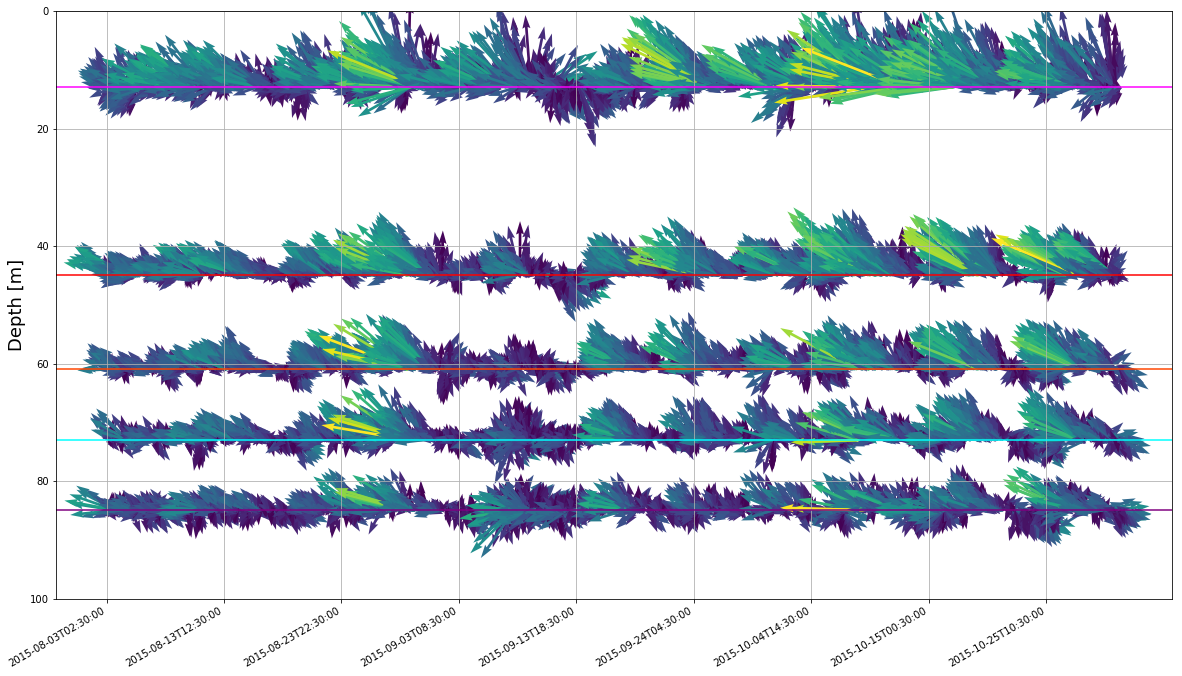

In [17]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)





time_axis = datetime_A1[:4320]
time_tick = time_axis[::step]
time_axis_quiver = np.arange(0,4320,step)



fig, ax = plt.subplots(1, 1, figsize=(20,12))


ax.quiver(time_axis_quiver, 12.95, vel_east_12[::step], vel_north_12[::step], mag_12[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=12.95, color='magenta', label = '13 m')

ax.quiver(time_axis_quiver, 44.95, vel_east_44[::step], vel_north_44[::step], mag_44[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=44.95, color='red', label = '45 m')

ax.quiver(time_axis_quiver, 60.95, vel_east_60[::step], vel_north_60[::step], mag_60[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=60.95, color='orangered', label = '60.95 m')

ax.quiver(time_axis_quiver, 72.95, vel_east_72[::step], vel_north_72[::step], mag_72[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=72.95, color='cyan', label = '72 m')

ax.quiver(time_axis_quiver, 84.95, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=84.95, color='purple', label = '84 m')

ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::500], time_tick[::500])
ax.format_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(0, 100)
ax.invert_yaxis()
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

In [20]:

vel_north_12 = np.array(A1_data['vel_north_12.95'], dtype = np.float)[:2420]
vel_east_12  = np.array(A1_data['vel_east_12.95'], dtype = np.float)[:2420]
mag_12       = np.sqrt(vel_east_12**2,vel_north_12**2)

vel_north_44 = np.array(A1_data['vel_north_44.95'], dtype = np.float)[:2420]
vel_east_44  = np.array(A1_data['vel_east_44.95'], dtype = np.float)[:2420]
mag_44       = np.sqrt(vel_east_44**2,vel_north_44**2)

vel_north_60 = np.array(A1_data['vel_north_60.95'], dtype = np.float)[:2420]
vel_east_60  = np.array(A1_data['vel_east_60.95'], dtype = np.float)[:2420]
mag_60      = np.sqrt(vel_east_60**2,vel_north_60**2)

vel_north_72 = np.array(A1_data['vel_north_72.95'], dtype = np.float)[:2420]
vel_east_72 = np.array(A1_data['vel_east_72.95'], dtype = np.float)[:2420]
mag_72      = np.sqrt(vel_east_72**2,vel_north_72**2)

vel_north_84 = np.array(A1_data['vel_north_84.95'], dtype = np.float)[:2420]
vel_east_84 = np.array(A1_data['vel_east_84.95'], dtype = np.float)[:2420]
mag_84      = np.sqrt(vel_east_84**2,vel_north_84**2)

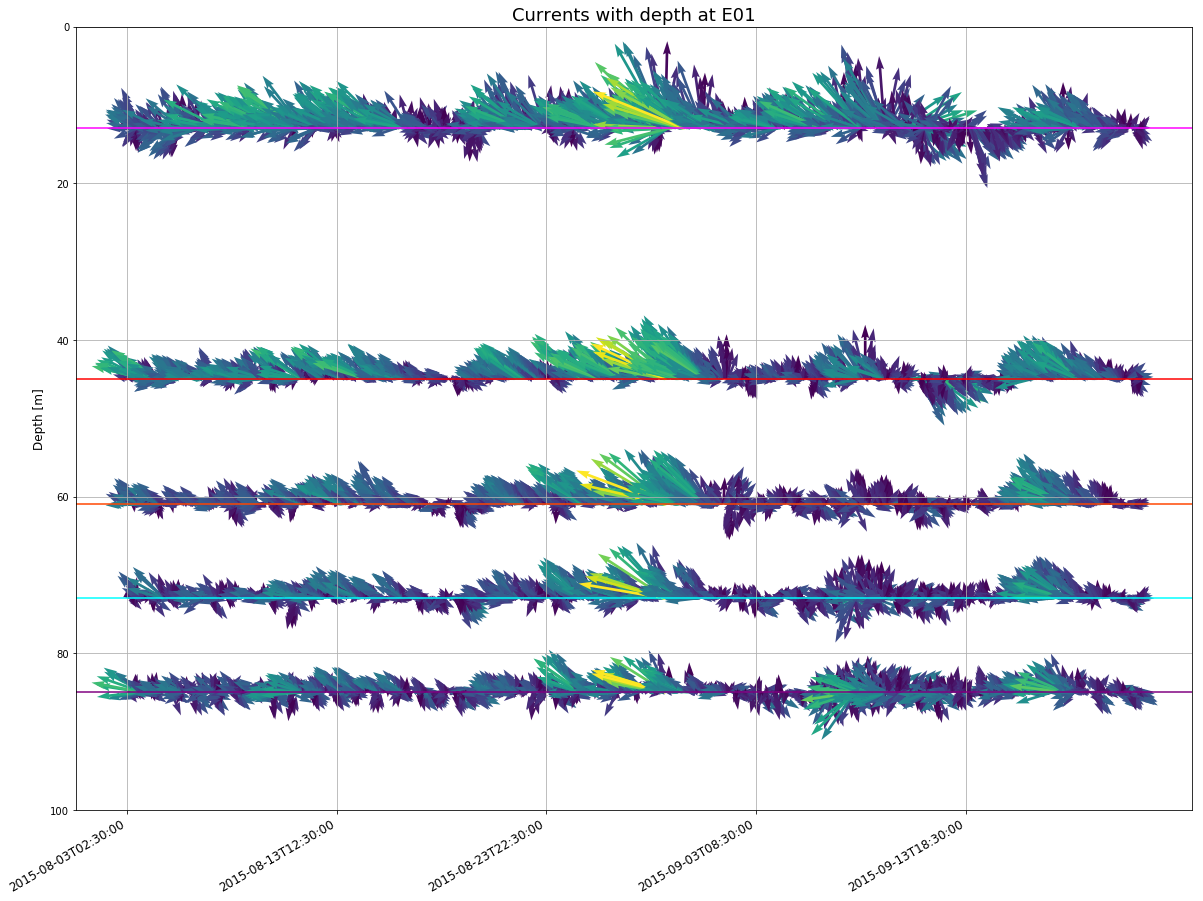

In [21]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)





time_axis = datetime_A1[:2420]
time_tick = time_axis[::step]
time_axis_quiver = np.arange(0,2420,step)



fig, ax = plt.subplots(1, 1, figsize=(20,16))


ax.quiver(time_axis_quiver, 12.95, vel_east_12[::step], vel_north_12[::step], mag_12[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=12.95, color='magenta', label = '13 m')

ax.quiver(time_axis_quiver, 44.95, vel_east_44[::step], vel_north_44[::step], mag_44[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=44.95, color='red', label = '45 m')

ax.quiver(time_axis_quiver, 60.95, vel_east_60[::step], vel_north_60[::step], mag_60[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=60.95, color='orangered', label = '60.95 m')

ax.quiver(time_axis_quiver, 72.95, vel_east_72[::step], vel_north_72[::step], mag_72[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=72.95, color='cyan', label = '72 m')

ax.quiver(time_axis_quiver, 84.95, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
ax.axhline(y=84.95, color='purple', label = '84 m')

ax.set_ylabel('Depth [m]', fontsize =12)
plt.xticks(time_axis_quiver[::500], time_tick[::500], fontsize =12)
ax.format_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(0, 100)
ax.invert_yaxis()
ax.set_title('Currents with depth at E01', fontsize =18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

In [22]:

spic_A1_jun_26_4 = short_spic_iso_jun[:,4,y,x]

spic_A1_jul_26_4 = short_spic_iso_jul[:,4,y,x]

spic_A1_aug_26_4 = short_spic_iso_aug[:,4,y,x]

spic_3_months_A1_26_4 = np.concatenate((spic_A1_jun_26_4, spic_A1_jul_26_4, spic_A1_aug_26_4), axis = 0)


spic_A1_jun_26_3 = short_spic_iso_jun[:,3,y,x]

spic_A1_jul_26_3 = short_spic_iso_jul[:,3,y,x]

spic_A1_aug_26_3 = short_spic_iso_aug[:,3,y,x]

spic_3_months_A1_26_3 = np.concatenate((spic_A1_jun_26_3, spic_A1_jul_26_3, spic_A1_aug_26_3), axis =0)


date1 = '2015-06-01'
date2 = '2015-08-31'
mydates = np.array(pd.date_range(date1, date2))

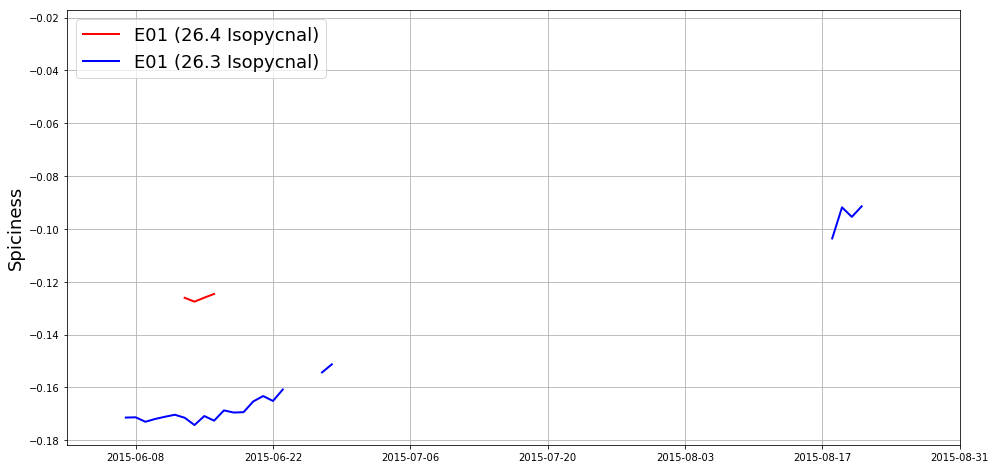

In [23]:

 
# Make plots
fig, (ax) = plt.subplots(1, 1, figsize=(16,8))
ax.plot(mydates , spic_3_months_A1_26_4, 'r-',linewidth=2, label = 'E01 (26.4 Isopycnal)')
ax.plot(mydates , spic_3_months_A1_26_3, 'b-',linewidth=2, label = 'E01 (26.3 Isopycnal)')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.set_ylabel('Spiciness', fontsize =18)
ax.set_xlim(mydates[0],mydates[-1])
#ax.set_xticklabels(date_time[3600:6808])
# ax2.set_ylim(-12,10)
ax.grid() 





In [24]:
spic_A1_jun_26_4 = short_spic_iso_jun[:,0,y,x]

spic_A1_jul_26_4 = short_spic_iso_jul[:,0,y,x]

spic_A1_aug_26_4 = short_spic_iso_aug[:,0,y,x]

spic_3_months_A1_26_4 = np.concatenate((spic_A1_jun_26_4, spic_A1_jul_26_4, spic_A1_aug_26_4), axis = 0)

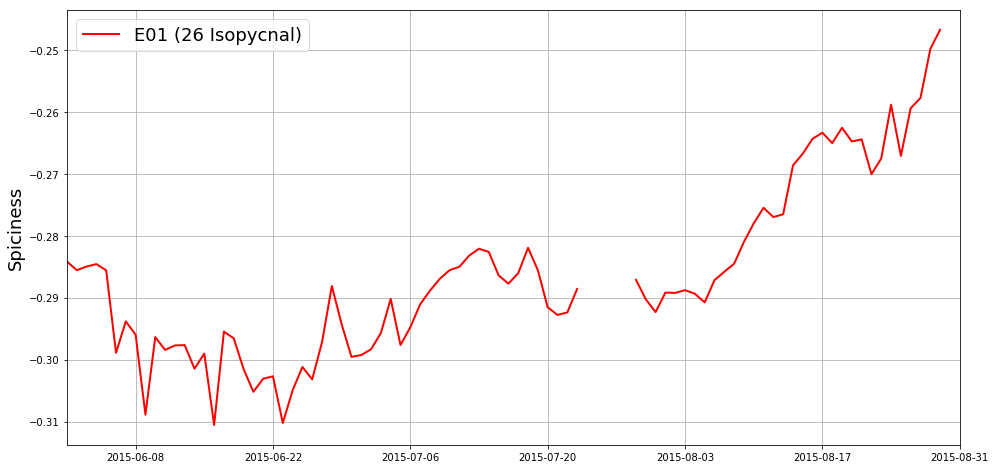

In [25]:

 
# Make plots
fig, (ax) = plt.subplots(1, 1, figsize=(16,8))
ax.plot(mydates , spic_3_months_A1_26_4, 'r-',linewidth=2, label = 'E01 (26 Isopycnal)')
# ax.plot(mydates , spic_3_months_A1_26_3, 'b-',linewidth=2, label = 'E01 (26.3 Isopycnal)')
legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.set_ylabel('Spiciness', fontsize =18)
ax.set_xlim(mydates[0],mydates[-1])
#ax.set_xticklabels(date_time[3600:6808])
# ax2.set_ylim(-12,10)
ax.grid() 





## 2013 DATA ADCP A1

In [21]:
A1_data = pd.read_table('/data/ssahu/IOS_data/ADCP_E1_A1/a1_20130707_20140524_0498m.csv',delim_whitespace=1,header = None, skiprows=426)

str_stuff = np.array(['Record_Number', 'Date', 'Time', 'Pitch', 'Roll', 'Heading', 'Pressure', 'Temperature'], dtype = 'str')

bin_depths = np.array([84.44, 100.44, 116.44, 132.44, 148.44, 164.44, 180.44, 196.44, 212.44, 228.44, 244.44, 260.44, 276.44\
              , 292.44, 308.44, 324.44, 340.44, 356.44, 372.44, 388.44, 404.44, 420.44, 436.44, 452.44, 468.44], dtype = 'str')

variables = np.array(['vel_north', 'vel_east', 'vel_vert', 'back_scatter_mean'], dtype = 'str')

column_data = []

for j in bin_depths:
    for i in variables:
        column_data = np.append(arr=column_data, values=i+'_'+j)
    

columns_A1 = np.concatenate((str_stuff, column_data), axis = 0)

A1_data.columns = columns_A1

In [9]:
A1_data.tail(10)

Record_Number        Date      Time  Pitch  Roll  Heading  Pressure  \
15365        15368.0  2014/05/24  01:30:00  -0.18 -0.80   190.94   500.445   
15366        15369.0  2014/05/24  02:00:00  -0.19 -0.78   188.55   500.528   
15367        15370.0  2014/05/24  02:30:00  -0.19 -0.76   189.52   500.283   
15368        15371.0  2014/05/24  03:00:00  -0.17 -0.76   190.99   500.114   
15369        15372.0  2014/05/24  03:30:00  -0.18 -0.81   191.23   500.482   
15370        15373.0  2014/05/24  04:00:00  -0.23 -0.81   190.32   501.181   
15371        15374.0  2014/05/24  04:30:00  -0.26 -0.80   189.36   500.381   
15372        15375.0  2014/05/24  05:00:00  -0.37 -0.79   187.32   500.373   
15373        15376.0  2014/05/24  05:30:00  -0.33 -0.76   187.94   500.781   
15374        15377.0  2014/05/24  06:00:00  -0.33 -0.78   186.31   500.433   

       Temperature  vel_north_84.44  vel_east_84.44            ...             \
15365         5.17        -0.151356        0.147947            ...              
15366         5.13        -0.069209        0.030969            ...              
15367         5.18        -0.102676        0.047851            ...              
15368         5.21        -0.012915        0.058807            ...              
15369         5.15        -0.063722        0.064058            ...              
15370         5.13        -0.038289        0.069814            ...              
15371         5.02        -0.040222        0.096427            ...              
15372         4.99        -0.078821        0.096028            ...              
15373         5.00        -0.089216        0.041540            ...              
15374         5.10        -0.137735        0.035985            ...              

       vel_vert_436.44  back_scatter_mean_436.44  vel_north_452.44  \
15365           -0.014                    126.50         -0.038281   
15366           -0.011                    129.50         -0.048684   
15367            0.000                    125.25         -0.039883   
15368            0.013                    130.25         -0.050416   
15369           -0.005                    125.25         -0.022519   
15370            0.004                    121.75         -0.037109   
15371           -0.001                    118.25         -0.006181   
15372            0.002                    114.75          0.018215   
15373           -0.003                    114.50          0.012045   
15374           -0.001                    114.75          0.017330   

       vel_east_452.44  vel_vert_452.44  back_scatter_mean_452.44  \
15365        -0.028558           -0.011                    136.75   
15366         0.015326           -0.016                    143.00   
15367         0.041066           -0.020                    140.75   
15368         0.065025            0.007                    140.50   
15369         0.025493           -0.001                    129.50   
15370         0.065992           -0.003                    125.50   
15371         0.006465           -0.004                    121.25   
15372         0.022366           -0.005                    120.50   
15373         0.015229            0.006                    122.75   
15374         0.025232            0.000                    121.75   

       vel_north_468.44  vel_east_468.44  vel_vert_468.44  \
15365         -0.071169         0.000015           -0.011   
15366         -0.064043         0.007446           -0.020   
15367         -0.065081         0.017591           -0.020   
15368         -0.036355         0.043201            0.007   
15369          0.042704         0.014225           -0.004   
15370         -0.014509         0.030058            0.002   
15371         -0.014815         0.044615            0.003   
15372         -0.005520         0.007715            0.001   
15373          0.014382         0.034788           -0.002   
15374          0.011220         0.034858            0.001   

       back_scatter_mean_468.44  
15365              

In [50]:
vel_north_84 = np.array(A1_data['vel_north_84.44'], dtype = np.float)[:5284]
vel_east_84  = np.array(A1_data['vel_east_84.44'], dtype = np.float)[:5284]
mag_84       = np.sqrt(vel_east_84**2,vel_north_84**2)

vel_north_148 = np.array(A1_data['vel_north_148.44'], dtype = np.float)[:5284]
vel_east_148  = np.array(A1_data['vel_east_148.44'], dtype = np.float)[:5284]
mag_148       = np.sqrt(vel_east_148**2,vel_north_148**2)

vel_north_196 = np.array(A1_data['vel_north_196.44'], dtype = np.float)[:5284]
vel_east_196  = np.array(A1_data['vel_east_196.44'], dtype = np.float)[:5284]
mag_196      = np.sqrt(vel_east_196**2,vel_north_196**2)

vel_north_228 = np.array(A1_data['vel_north_228.44'], dtype = np.float)[:5284]
vel_east_228 = np.array(A1_data['vel_east_228.44'], dtype = np.float)[:5284]
mag_228      = np.sqrt(vel_east_228**2,vel_north_228**2)

vel_north_260 = np.array(A1_data['vel_north_260.44'], dtype = np.float)[:5284]
vel_east_260 = np.array(A1_data['vel_east_260.44'], dtype = np.float)[:5284]
mag_260      = np.sqrt(vel_east_260**2,vel_north_260**2)

In [22]:
tarikh = np.array(A1_data['Date'], dtype = np.str)
samai  = np.array(A1_data['Time'], dtype = np.str)

time = np.empty_like(tarikh)

for i in np.arange(tarikh.shape[0]):
    time[i] = tarikh[i] + '' + samai[i]


datetime_A1 = np.empty_like(time)

for i in np.arange(datetime_A1.shape[0]):
    datetime_A1[i] = datetime.strptime(time[i], '%Y/%m/%d%H:%M:%S')
    
datetime_A1 = datetime_A1.astype(np.datetime64)


In [53]:
datetime_A1[:5284][0]

numpy.datetime64('2013-07-07T23:00:00')

In [23]:
mydates = np.array(pd.date_range(datetime_A1[:5284][0], datetime_A1[:5284][-1], freq="30min"))

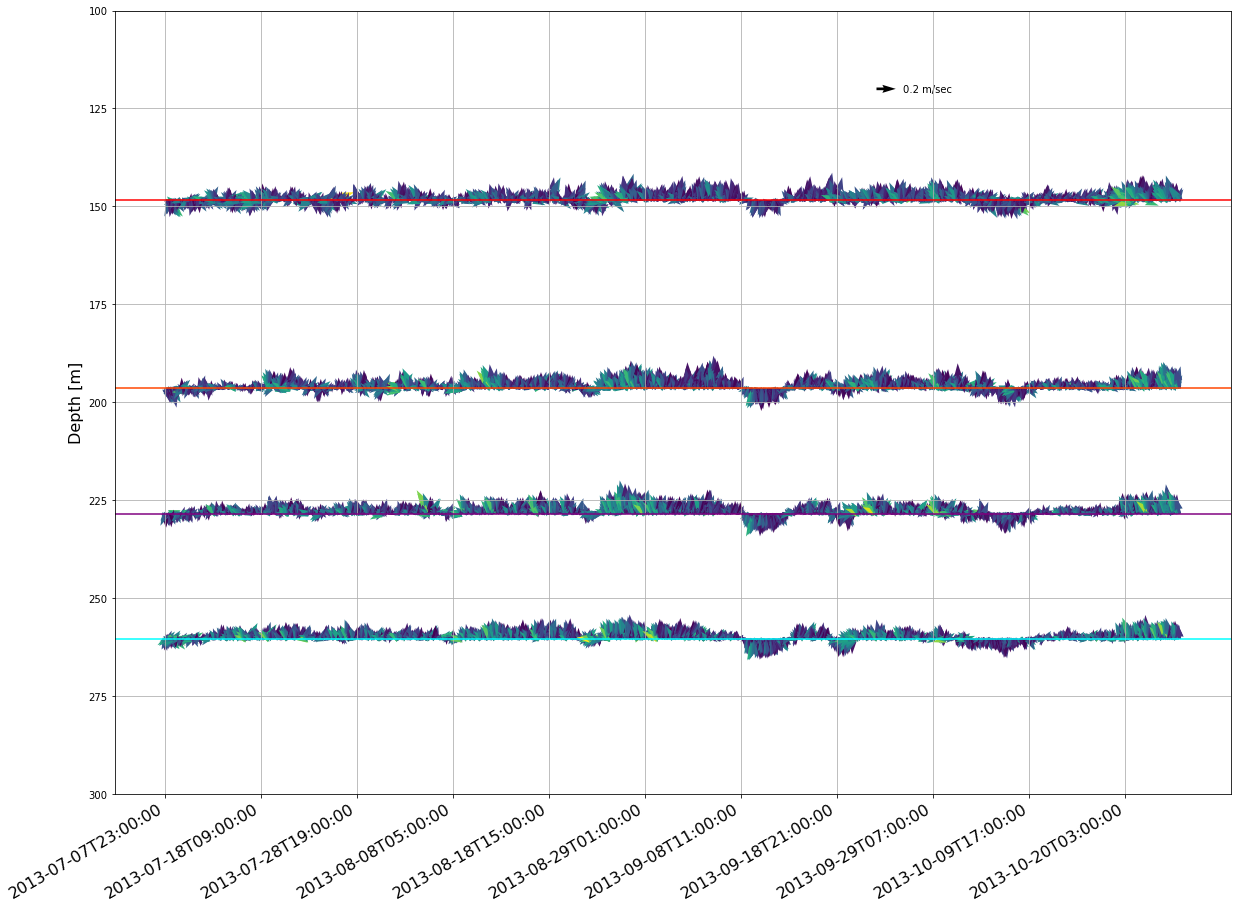

In [198]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)





time_axis = datetime_A1[:5284]
time_tick = time_axis[::step]
time_axis_quiver = np.arange(0,5284,step)



fig, ax = plt.subplots(1, 1, figsize=(20,16))


# ax.quiver(time_axis_quiver, 84.44, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches')#, scale=0.5)# , minshaft = 3)
# ax.axhline(y=84.44, color='magenta', label = '84 m')

ax.quiver(time_axis_quiver, 148.44, vel_east_148[::step], vel_north_148[::step], mag_148[::step], angles='uv')#, scale_units='inches')#, scale=0.5)# , minshaft = 3)
ax.axhline(y=148.44, color='red', label = '148 m')

ax.quiver(time_axis_quiver, 196.44, vel_east_196[::step], vel_north_196[::step], mag_196[::step], angles='uv')#, scale_units='inches')#, scale=0.5)# , minshaft = 3)
ax.axhline(y=196.44, color='orangered', label = '196 m')

ax.quiver(time_axis_quiver, 260.44, vel_east_260[::step], vel_north_260[::step], mag_260[::step], angles='uv')#, scale_units='inches')#, scale=0.5)# , minshaft = 3)
ax.axhline(y=260.44, color='cyan', label = '196 m')

Q = ax.quiver(time_axis_quiver, 228.44, vel_east_228[::step], vel_north_228[::step], mag_228[::step], angles='uv')#, scale_units='inches')#, scale=0.5)# , minshaft = 3)
ax.axhline(y=228.44, color='purple', label = '228 m')

ax.set_ylabel('Depth [m]', fontsize =16)
plt.xticks(time_axis_quiver[::500], time_tick[::500], fontsize = 16)
ax.format_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(100, 300)
ax.invert_yaxis()

ax.quiverkey(Q, 0.7, 0.9, 0.2, r'0.2 m/sec', labelpos='E')
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

In [171]:
A1_series_east = pd.Series(vel_east_84, index=mydates)
daily_east = A1_series_east.resample('1440T').sum()
vel_84_daily_east = daily_east.values
east_84 = np.divide(vel_84_daily_east[:], 24)

A1_series_north = pd.Series(vel_north_84, index=mydates)
daily_north = A1_series_north.resample('1440T').sum()
vel_84_daily_north = daily_north.values
north_84 = np.divide(vel_84_daily_north[:], 24)


Speed_84 = np.sqrt(east_84**2 + north_84**2)


A1_series_east = pd.Series(vel_east_148, index=mydates)
daily_east = A1_series_east.resample('1440T').sum()
vel_148_daily_east = daily_east.values
east_148 = np.divide(vel_148_daily_east[:], 24)

A1_series_north = pd.Series(vel_north_148, index=mydates)
daily_north = A1_series_north.resample('1440T').sum()
vel_148_daily_north = daily_north.values
north_148 = np.divide(vel_148_daily_north[:], 24)


Speed_148 = np.sqrt(east_148**2 + north_148**2)


A1_series_east = pd.Series(vel_east_196, index=mydates)
daily_east = A1_series_east.resample('1440T').sum()
vel_196_daily_east = daily_east.values
east_196 = np.divide(vel_196_daily_east[:], 24)

A1_series_north = pd.Series(vel_north_196, index=mydates)
daily_north = A1_series_north.resample('1440T').sum()
vel_196_daily_north = daily_north.values
north_196 = np.divide(vel_196_daily_north[:], 24)


Speed_196 = np.sqrt(east_196**2 + north_196**2)


A1_series_east = pd.Series(vel_east_228, index=mydates)
daily_east = A1_series_east.resample('1440T').sum()
vel_228_daily_east = daily_east.values
east_228 = np.divide(vel_228_daily_east[:], 24)

A1_series_north = pd.Series(vel_north_228, index=mydates)
daily_north = A1_series_north.resample('1440T').sum()
vel_228_daily_north = daily_north.values
north_228 = np.divide(vel_228_daily_north[:], 24)


Speed_228 = np.sqrt(east_228**2 + north_228**2)


A1_series_east = pd.Series(vel_east_260, index=mydates)
daily_east = A1_series_east.resample('1440T').sum()
vel_260_daily_east = daily_east.values
east_260 = np.divide(vel_260_daily_east[:], 24)

A1_series_north = pd.Series(vel_north_260, index=mydates)
daily_north = A1_series_north.resample('1440T').sum()
vel_260_daily_north = daily_north.values
north_260 = np.divide(vel_260_daily_north[:], 24)


Speed_260 = np.sqrt(east_260**2 + north_260**2)

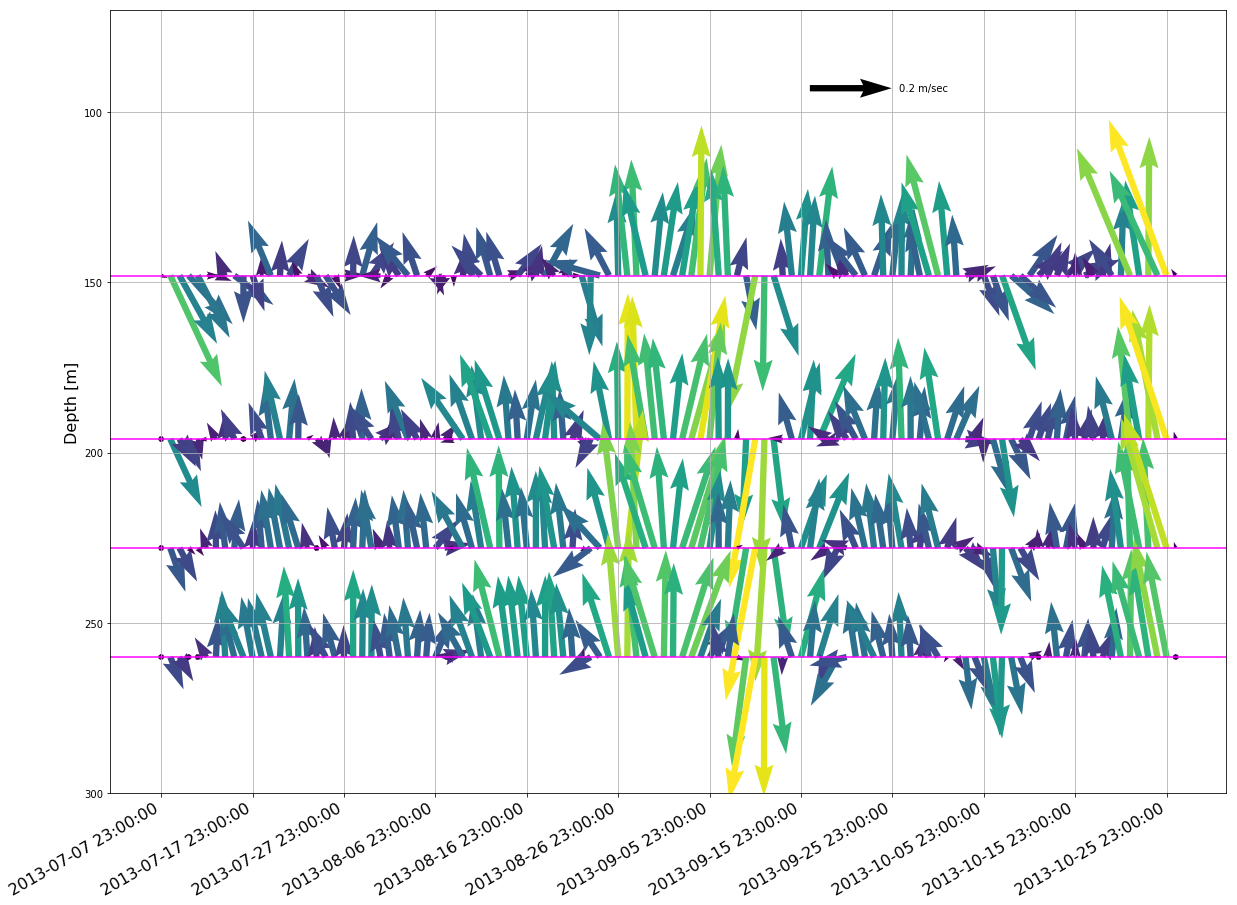

In [190]:
step = 1

# time_axis_quiver = np.arange(0,vel_east_30.shape[0],step)

time_axis_quiver_45 = np.arange(0, east_84.shape[0], step)


mydates = pd.date_range(datetime_A1[:5284][0], datetime_A1[:5284][-1], freq="D")




fig, ax = plt.subplots(1, 1, figsize=(20,16))

# ax.quiver(time_axis_quiver, 30, vel_east_30[::step], vel_north_30[::step], Speed_30[::step], angles='uv', scale_units='inches', minshaft= 0.01, scale=0.5)# , minshaft = 3)
# ax.axhline(y=30, color='magenta', label = '30 m')

# ax.quiver(time_axis_quiver_45, 84, east_84[::step], north_84[::step], Speed_84[::step], angles='uv', scale_units='inches')#, minshaft= 0.01, scale=0.3)# , minshaft = 3)
# ax.axhline(y=84, color='magenta', label = '84 m')


ax.quiver(time_axis_quiver_45, 148, east_148[:], north_148[:], Speed_148[:], angles='uv')#, scale_units='inches')#, minshaft= 0.01, scale=0.3)# , minshaft = 3)
ax.axhline(y=148, color='magenta', label = '148 m')

ax.quiver(time_axis_quiver_45, 196, east_196[:], north_196[:], Speed_196[:], angles='uv')#, scale_units='inches')#, minshaft= 0.01, scale=0.3)# , minshaft = 3)
ax.axhline(y=196, color='magenta', label = '196 m')


ax.quiver(time_axis_quiver_45, 228, east_228[:], north_228[:], Speed_228[:], angles='uv')#, scale_units='inches')#, minshaft= 0.01, scale=0.3)# , minshaft = 3)
ax.axhline(y=228, color='magenta', label = '228 m')

Q = ax.quiver(time_axis_quiver_45, 260, east_260[:], north_260[:], Speed_260[:], angles='uv')#, scale_units='inches')#, minshaft= 0.01, scale=0.3)# , minshaft = 3)
ax.axhline(y=260, color='magenta', label = '260 m')


ax.set_ylabel('Depth [m]', fontsize =16)
plt.xticks(time_axis_quiver_45[::10], mydates[::10], fontsize = 16)
ax.format_xdata = DateFormatter('%Y-%m-%d-%h-%m')
fig.autofmt_xdate()
ax.set_ylim(70,300)
ax.invert_yaxis()
ax.quiverkey(Q, 0.7, 0.9, 0.2, r'0.2 m/sec', labelpos='E')
# ax.set_title('Current Meter time series at W01', fontsize = 18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 

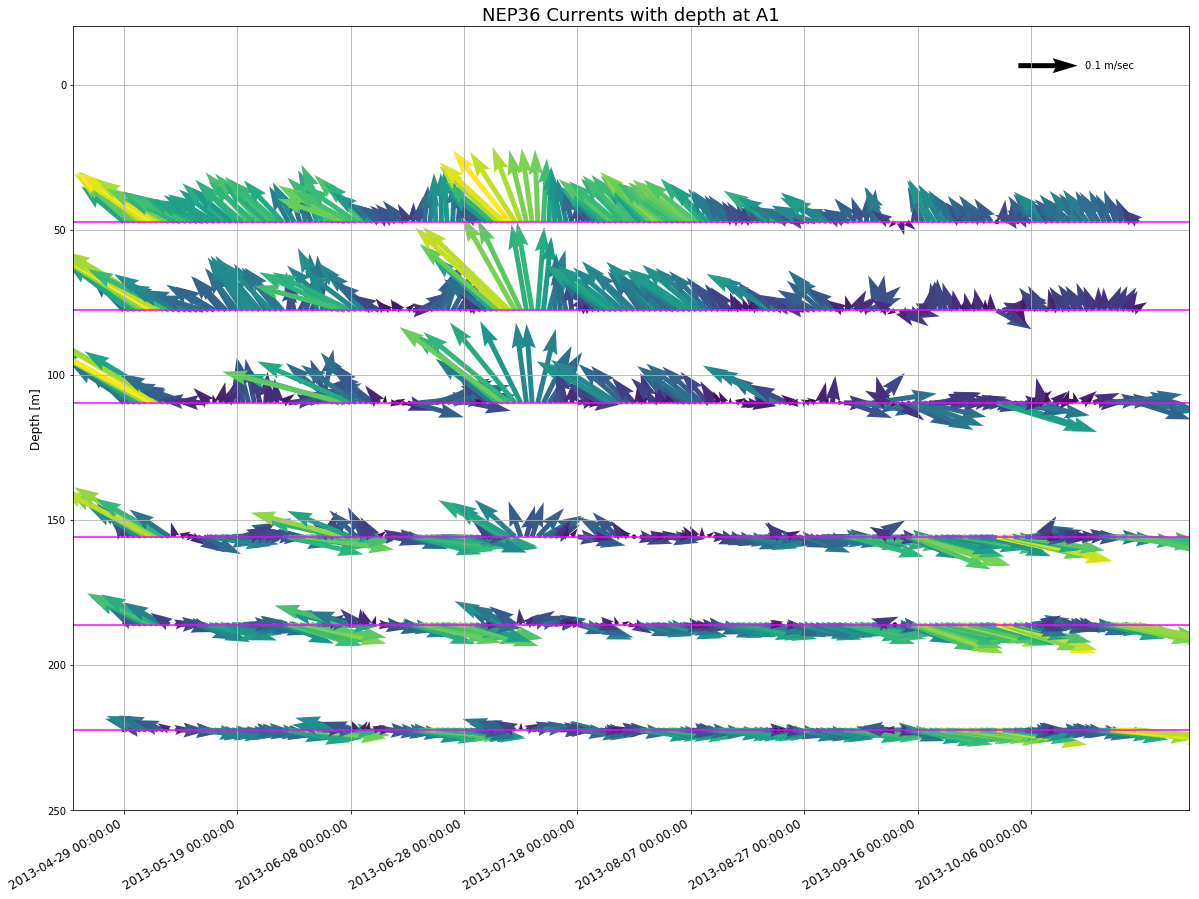

In [73]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)

time_axis_quiver = np.arange(0,180,step)




# time_axis = datetime_A1[:2420]
# time_tick = time_axis[::step]
# time_axis_quiver = np.arange(0,2420,step)



fig, ax = plt.subplots(1, 1, figsize=(20,16))

# ax.quiver(time_axis_quiver, zlevels[10], v_tzyx[:,10,j,i], u_tzyx[:,10,j,i], mag_vel[:,10,j,i], angles='uv', scale_units='inches')
# ax.axhline(y=zlevels[10], color='magenta', label = '{0} m'.format(zlevels[10]))

ax.quiver(time_axis_quiver, zlevels[17], v_tzyx[:,17,j,i], u_tzyx[:,17,j,i], mag_vel[:,17,j,i], angles='uv', scale_units='inches')
ax.axhline(y=zlevels[17], color='magenta', label = '{0} m'.format(zlevels[17]))

ax.quiver(time_axis_quiver, zlevels[20], v_tzyx[:,20,j,i], u_tzyx[:,20,j,i], mag_vel[:,20,j,i], angles='uv', scale_units='inches')
ax.axhline(y=zlevels[20], color='magenta', label = '{0} m'.format(zlevels[20]))

ax.quiver(time_axis_quiver, zlevels[22], v_tzyx[:,22,j,i], u_tzyx[:,22,j,i], mag_vel[:,22,j,i], angles='uv', scale_units='inches')
ax.axhline(y=zlevels[22], color='magenta', label = '{0} m'.format(zlevels[22]))

ax.quiver(time_axis_quiver, zlevels[24], v_tzyx[:,24,j,i], u_tzyx[:,24,j,i], mag_vel[:,24,j,i], angles='uv', scale_units='inches')
ax.axhline(y=zlevels[24], color='magenta', label = '{0} m'.format(zlevels[23]))

ax.quiver(time_axis_quiver, zlevels[25], v_tzyx[:,25,j,i], u_tzyx[:,25,j,i], mag_vel[:,25,j,i], angles='uv', scale_units='inches')
ax.axhline(y=zlevels[25], color='magenta', label = '{0} m'.format(zlevels[25]))

Q = ax.quiver(time_axis_quiver, zlevels[26], v_tzyx[:,26,j,i], u_tzyx[:,26,j,i], mag_vel[:,26,j,i], angles='uv', scale_units='inches')
ax.axhline(y=zlevels[26], color='magenta', label = '{0} m'.format(zlevels[26]))


# ax.quiver(time_axis_quiver, 84.44, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=84.44, color='magenta', label = '84 m')

# ax.quiver(time_axis_quiver, 148.44, vel_east_148[::step], vel_north_148[::step], mag_148[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=148.44, color='red', label = '148 m')

# ax.quiver(time_axis_quiver, 196.44, vel_east_196[::step], vel_north_196[::step], mag_196[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=196.44, color='orangered', label = '196 m')

# ax.quiver(time_axis_quiver, 260.44, vel_east_260[::step], vel_north_260[::step], mag_260[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=260.44, color='cyan', label = '196 m')

# ax.quiver(time_axis_quiver, 228.44, vel_east_228[::step], vel_north_228[::step], mag_228[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=228.44, color='purple', label = '228 m')

ax.set_ylabel('Depth [m]', fontsize =12)
plt.xticks(time_axis_quiver[::20], mydates[::20], fontsize =12)
# ax.format_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(-20, 250)
ax.invert_yaxis()
ax.set_title('NEP36 Currents with depth at A1', fontsize =18)
ax.quiverkey(Q, 0.9, 0.95, 0.1, r'0.1 m/sec', labelpos='E')
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 
# ax.quiverkey()
plt.show()

In [6]:
def U_timeseries_at_WCVI_locations(grid_U):
    
    u_vel = grid_U.variables['uo'][:,:,:,:]

    
    vector_u = namedtuple('vector_u', 'u_vel')

    return vector_u(u_vel)


def V_timeseries_at_WCVI_locations(grid_V):
    
    v_vel = grid_V.variables['vo'][:,:,:,:]

    
    vector_v = namedtuple('vector_v', 'v_vel')

    return vector_v(v_vel)

In [23]:

zlevels = nc.Dataset('/data/ssahu/NEP36_2013_summer_hindcast/cut_NEP36-S29_1d_20130429_20131025_grid_U_20130429-20130508.nc').variables['depthu']







# y_wcvi_slice = np.array(np.arange(220,280))
# x_wcvi_slice = np.array(np.arange(590,650))
y_wcvi_slice = np.array(np.arange(180,350))
x_wcvi_slice = np.array(np.arange(480,650))

file = nc.Dataset('/data/ssahu/NEP36_2013_summer_hindcast/cut_NEP36-S29_1d_20130429_20131025_grid_U_20130429-20130508.nc')


lon = file['nav_lon'][:]
lat = file['nav_lat'][:]


# mbathy[mbathy>32] = 32

In [25]:

lon_A1 = -126.20433
lat_A1 = 48.52958

j, i = geo_tools.find_closest_model_point(lon_A1,lat_A1,\
                                          lon_spic_file,lat_spic_file,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}}) 


print(j,i)


89 92


In [27]:
def U_timeseries_at_WCVI_locations(grid_U):
    
    u_vel = grid_U.variables['uo'][:,:,:,:]

    
    vector_u = namedtuple('vector_u', 'u_vel')

    return vector_u(u_vel)


def V_timeseries_at_WCVI_locations(grid_V):
    
    v_vel = grid_V.variables['vo'][:,:,:,:]

    
    vector_v = namedtuple('vector_v', 'v_vel')

    return vector_v(v_vel)

In [28]:
zlevels = nc.Dataset('/data/mdunphy/NEP036-N30-OUT/CDF_COMB_COMPRESSED/NEP036-N30_IN_20140915_00001440_grid_T.nc').variables['deptht'][:32]


In [29]:
from __future__ import division
import glob
import os
import fnmatch
from collections import namedtuple, OrderedDict

import os


u_vel = np.empty((180,zlevels.shape[0],y_wcvi_slice.shape[0]+1,x_wcvi_slice.shape[0]+1))
v_vel = np.empty((180,zlevels.shape[0],y_wcvi_slice.shape[0]+1,x_wcvi_slice.shape[0]+1))



i = 0

for file in sorted(glob.glob('/data/ssahu/NEP36_2013_summer_hindcast/cut_NEP36-S29_1d*grid_U*.nc')):
    vector_u = U_timeseries_at_WCVI_locations(nc.Dataset(file))
    u_vel[i:i+10,...] = vector_u[0]
    i = i+10

j = 0
for file in sorted(glob.glob('/data/ssahu/NEP36_2013_summer_hindcast/cut_NEP36-S29_1d*grid_V*.nc')):
    vector_v = V_timeseries_at_WCVI_locations(nc.Dataset(file))
    v_vel[j:j+10,...] = vector_v[0]
    j = j+10
    

In [30]:
u_tzyx, v_tzyx = viz_tools.unstagger(u_vel, v_vel)

mag_vel = np.sqrt(np.multiply(u_tzyx,u_tzyx) +  np.multiply(v_tzyx,v_tzyx));
ang_vel = np.degrees(np.arctan2(v_tzyx, u_tzyx));

In [31]:
u_unrotated = u_tzyx
v_unrotated = v_tzyx



In [11]:
mag_vel.shape

(180, 32, 170, 170)

In [12]:
import sys
sys.path.append('/ocean/ssahu/CANYONS/wcvi/grid/')
from grid_alignment import calculate_initial_compass_bearing as cibc
import matplotlib.dates as mdates

In [13]:

# First point
lonA_wcvi = lon[:,0:-1]
latA_wcvi = lat[:,0:-1]
# Second point
lonB_wcvi = lon[:,1:]
latB_wcvi = lat[:,1:]


bearing_wcvi = cibc((latA_wcvi,lonA_wcvi),(latB_wcvi,lonB_wcvi))
angle_needed_wcvi = 90 - bearing_wcvi

angle_unrotated = np.empty((ang_vel.shape[0],ang_vel.shape[1],ang_vel.shape[2], ang_vel.shape[3]))


for p in np.arange(ang_vel.shape[0]):
    for i in np.arange(ang_vel.shape[1]):
        angle_unrotated[p,i,...] = ang_vel[p,i,...] + angle_needed_wcvi[1:,:]
                               
                               
u_unrotated = mag_vel*np.cos(np.radians(angle_unrotated))
v_unrotated = mag_vel*np.sin(np.radians(angle_unrotated))


In [14]:
u_unrotated.shape

(180, 32, 170, 170)

In [15]:
date2

NameError: name 'date2' is not defined

In [16]:
date1 = '2013-04-29'
date2 = '2013-10-25'
mydates = pd.date_range(date1, date2, freq= 'D')

In [20]:
v_unrotated[:,17,j,i]

IndexError: index 180 is out of bounds for axis 2 with size 170

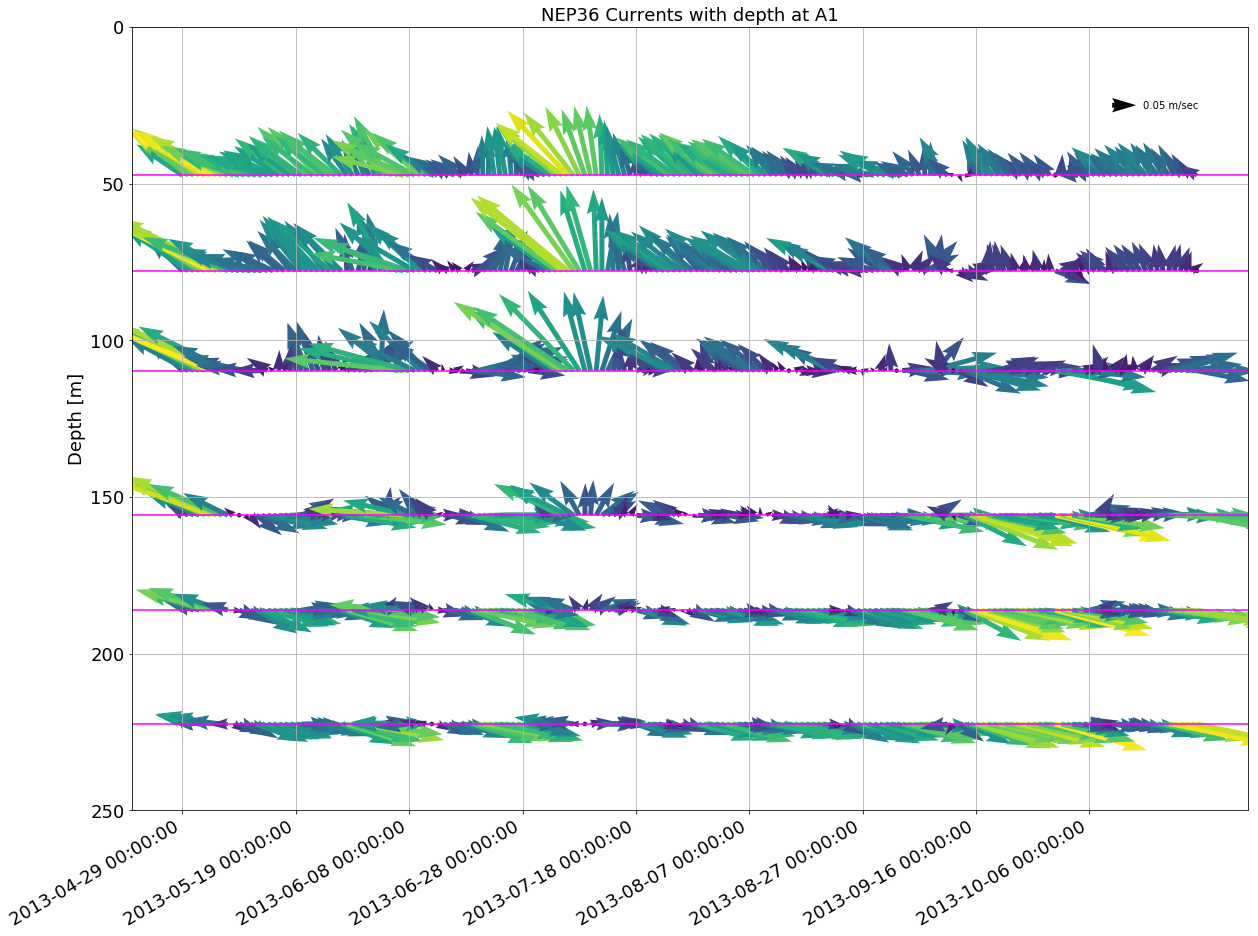

In [31]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)

time_axis_quiver = np.arange(0,180,step)




# time_axis = datetime_A1[:2420]
# time_tick = time_axis[::step]
# time_axis_quiver = np.arange(0,2420,step)



fig, ax = plt.subplots(1, 1, figsize=(20,16))

# ax.quiver(time_axis_quiver, zlevels[10], v_tzyx[:,10,j,i], u_tzyx[:,10,j,i], mag_vel[:,10,j,i], angles='uv', scale_units='inches')
# ax.axhline(y=zlevels[10], color='magenta', label = '{0} m'.format(zlevels[10]))

ax.quiver(time_axis_quiver, zlevels[17], v_unrotated[:,17,j,i], u_unrotated[:,17,j,i], mag_vel[:,17,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[17], color='magenta', label = '{0} m'.format(zlevels[17]))

ax.quiver(time_axis_quiver, zlevels[20], v_unrotated[:,20,j,i], u_unrotated[:,20,j,i], mag_vel[:,20,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[20], color='magenta', label = '{0} m'.format(zlevels[20]))

ax.quiver(time_axis_quiver, zlevels[22], v_unrotated[:,22,j,i], u_unrotated[:,22,j,i], mag_vel[:,22,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[22], color='magenta', label = '{0} m'.format(zlevels[22]))

ax.quiver(time_axis_quiver, zlevels[24], v_unrotated[:,24,j,i], u_unrotated[:,24,j,i], mag_vel[:,24,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[24], color='magenta', label = '{0} m'.format(zlevels[23]))

ax.quiver(time_axis_quiver, zlevels[25], v_unrotated[:,25,j,i], u_unrotated[:,25,j,i], mag_vel[:,25,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[25], color='magenta', label = '{0} m'.format(zlevels[25]))

Q = ax.quiver(time_axis_quiver, zlevels[26], v_unrotated[:,26,j,i], u_unrotated[:,26,j,i], mag_vel[:,26,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[26], color='magenta', label = '{0} m'.format(zlevels[26]))


# ax.quiver(time_axis_quiver, 84.44, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=84.44, color='magenta', label = '84 m')

# ax.quiver(time_axis_quiver, 148.44, vel_east_148[::step], vel_north_148[::step], mag_148[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=148.44, color='red', label = '148 m')

# ax.quiver(time_axis_quiver, 196.44, vel_east_196[::step], vel_north_196[::step], mag_196[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=196.44, color='orangered', label = '196 m')

# ax.quiver(time_axis_quiver, 260.44, vel_east_260[::step], vel_north_260[::step], mag_260[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=260.44, color='cyan', label = '196 m')

# ax.quiver(time_axis_quiver, 228.44, vel_east_228[::step], vel_north_228[::step], mag_228[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=228.44, color='purple', label = '228 m')


ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::20], mydates[::20], fontsize =16)
# ax.format_xdata = DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# hfmt = DateFormatter('%Y-%m-%d-%H:%M:%S')
# ax.xaxis.set_major_formatter(hfmt)
# ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(0, 250)
ax.invert_yaxis()
ax.set_title('NEP36 Currents with depth at A1', fontsize =18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 
# ax.quiverkey()
ax.quiverkey(Q, 0.9, 0.9, 0.05, r'0.05 m/sec', labelpos='E')
ax.xaxis_date()
ax.tick_params(axis='both',labelsize =18)
plt.show()

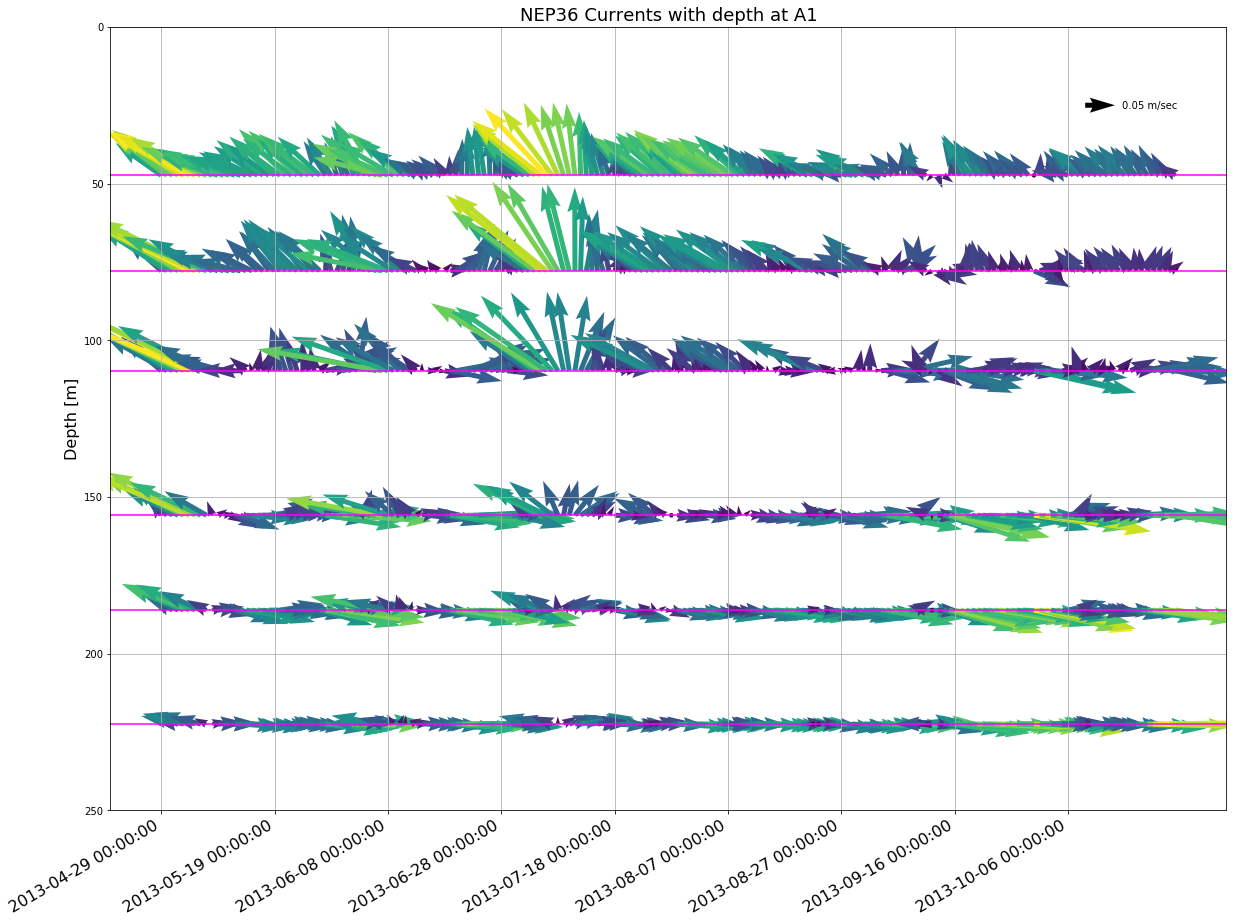

In [70]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)

time_axis_quiver = np.arange(0,180,step)




# time_axis = datetime_A1[:2420]
# time_tick = time_axis[::step]
# time_axis_quiver = np.arange(0,2420,step)



fig, ax = plt.subplots(1, 1, figsize=(20,16))

# ax.quiver(time_axis_quiver, zlevels[10], v_tzyx[:,10,j,i], u_tzyx[:,10,j,i], mag_vel[:,10,j,i], angles='uv', scale_units='inches')
# ax.axhline(y=zlevels[10], color='magenta', label = '{0} m'.format(zlevels[10]))

ax.quiver(time_axis_quiver, zlevels[17], v_unrotated[:,17,j,i], u_unrotated[:,17,j,i], mag_vel[:,17,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[17], color='magenta', label = '{0} m'.format(zlevels[17]))

ax.quiver(time_axis_quiver, zlevels[20], v_unrotated[:,20,j,i], u_unrotated[:,20,j,i], mag_vel[:,20,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[20], color='magenta', label = '{0} m'.format(zlevels[20]))

ax.quiver(time_axis_quiver, zlevels[22], v_unrotated[:,22,j,i], u_unrotated[:,22,j,i], mag_vel[:,22,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[22], color='magenta', label = '{0} m'.format(zlevels[22]))

ax.quiver(time_axis_quiver, zlevels[24], v_unrotated[:,24,j,i], u_unrotated[:,24,j,i], mag_vel[:,24,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[24], color='magenta', label = '{0} m'.format(zlevels[23]))

ax.quiver(time_axis_quiver, zlevels[25], v_unrotated[:,25,j,i], u_unrotated[:,25,j,i], mag_vel[:,25,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[25], color='magenta', label = '{0} m'.format(zlevels[25]))

Q = ax.quiver(time_axis_quiver, zlevels[26], v_unrotated[:,26,j,i], u_unrotated[:,26,j,i], mag_vel[:,26,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[26], color='magenta', label = '{0} m'.format(zlevels[26]))


# ax.quiver(time_axis_quiver, 84.44, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=84.44, color='magenta', label = '84 m')

# ax.quiver(time_axis_quiver, 148.44, vel_east_148[::step], vel_north_148[::step], mag_148[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=148.44, color='red', label = '148 m')

# ax.quiver(time_axis_quiver, 196.44, vel_east_196[::step], vel_north_196[::step], mag_196[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=196.44, color='orangered', label = '196 m')

# ax.quiver(time_axis_quiver, 260.44, vel_east_260[::step], vel_north_260[::step], mag_260[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=260.44, color='cyan', label = '196 m')

# ax.quiver(time_axis_quiver, 228.44, vel_east_228[::step], vel_north_228[::step], mag_228[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=228.44, color='purple', label = '228 m')


ax.set_ylabel('Depth [m]', fontsize =16)
plt.xticks(time_axis_quiver[::20], mydates[::20], fontsize =16)
# ax.format_xdata = DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# hfmt = DateFormatter('%Y-%m-%d-%H:%M:%S')
# ax.xaxis.set_major_formatter(hfmt)
# ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(0, 250)
ax.invert_yaxis()
ax.set_title('NEP36 Currents with depth at A1', fontsize =18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 
# ax.quiverkey()
ax.quiverkey(Q, 0.9, 0.9, 0.05, r'0.05 m/sec', labelpos='E')
ax.xaxis_date()
plt.show()

In [33]:

lon_A1 = -126.20433
lat_A1 = 48.52958

j, i = geo_tools.find_closest_model_point(lon_A1,lat_A1,\
                                          lon_spic_file,lat_spic_file,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}}) 


print(j,i)


89 92


In [29]:
date1 = '2013-04-29'
date2 = '2013-10-25'
mydates = np.array(pd.date_range(date1, date2))

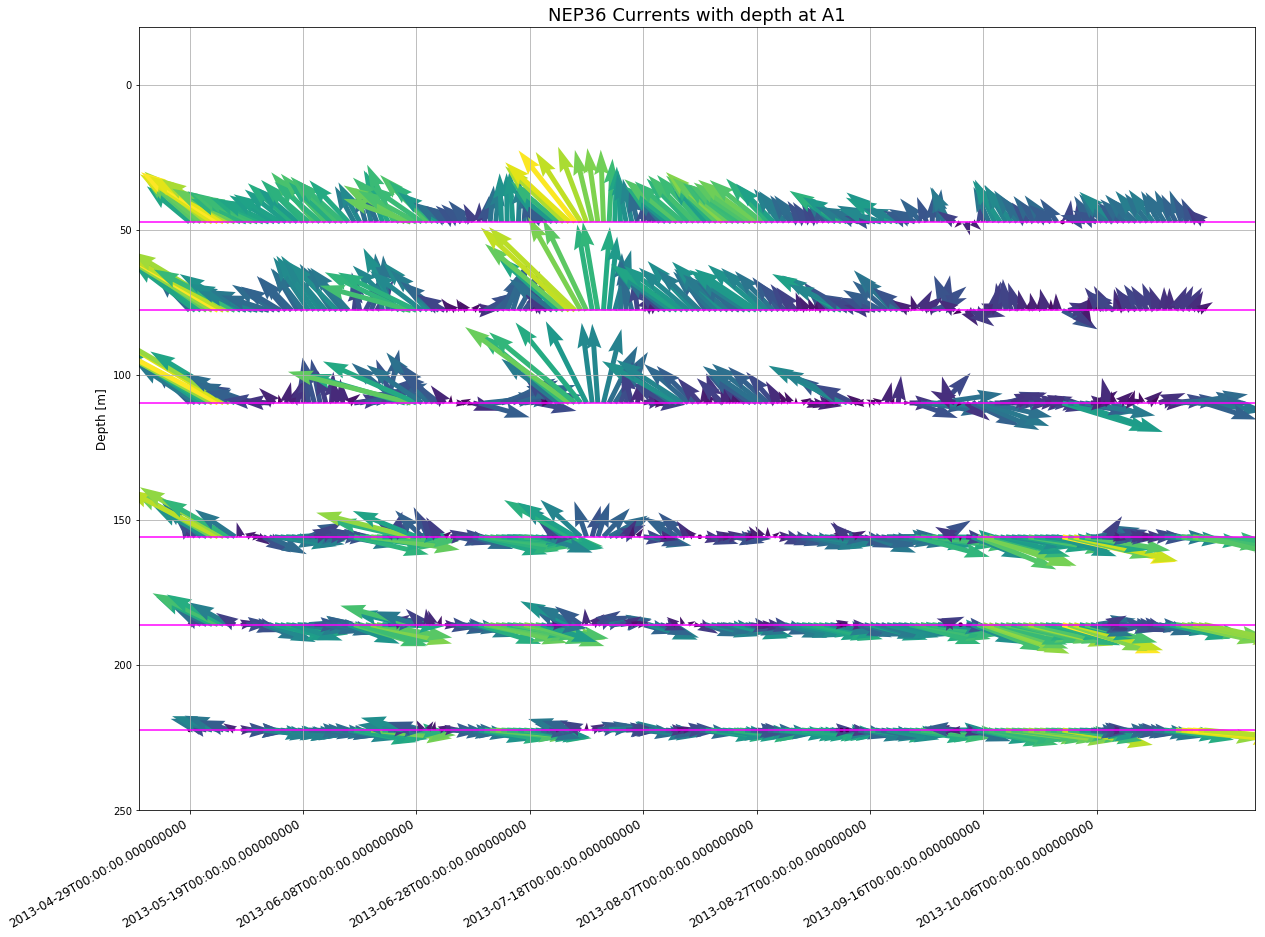

In [61]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)

time_axis_quiver = np.arange(0,180,step)




# time_axis = datetime_A1[:2420]
# time_tick = time_axis[::step]
# time_axis_quiver = np.arange(0,2420,step)



fig, ax = plt.subplots(1, 1, figsize=(20,16))

# ax.quiver(time_axis_quiver, zlevels[10], v_tzyx[:,10,j,i], u_tzyx[:,10,j,i], mag_vel[:,10,j,i], angles='uv', scale_units='inches')
# ax.axhline(y=zlevels[10], color='magenta', label = '{0} m'.format(zlevels[10]))

ax.quiver(time_axis_quiver, zlevels[17], v_tzyx[:,17,j,i], u_tzyx[:,17,j,i], mag_vel[:,17,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[17], color='magenta', label = '{0} m'.format(zlevels[17]))

ax.quiver(time_axis_quiver, zlevels[20], v_tzyx[:,20,j,i], u_tzyx[:,20,j,i], mag_vel[:,20,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[20], color='magenta', label = '{0} m'.format(zlevels[20]))

ax.quiver(time_axis_quiver, zlevels[22], v_tzyx[:,22,j,i], u_tzyx[:,22,j,i], mag_vel[:,22,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[22], color='magenta', label = '{0} m'.format(zlevels[22]))

ax.quiver(time_axis_quiver, zlevels[24], v_tzyx[:,24,j,i], u_tzyx[:,24,j,i], mag_vel[:,24,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[24], color='magenta', label = '{0} m'.format(zlevels[23]))

ax.quiver(time_axis_quiver, zlevels[25], v_tzyx[:,25,j,i], u_tzyx[:,25,j,i], mag_vel[:,25,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[25], color='magenta', label = '{0} m'.format(zlevels[25]))

ax.quiver(time_axis_quiver, zlevels[26], v_tzyx[:,26,j,i], u_tzyx[:,26,j,i], mag_vel[:,26,j,i], angles='uv')#, scale_units='inches')
ax.axhline(y=zlevels[26], color='magenta', label = '{0} m'.format(zlevels[26]))


# ax.quiver(time_axis_quiver, 84.44, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=84.44, color='magenta', label = '84 m')

# ax.quiver(time_axis_quiver, 148.44, vel_east_148[::step], vel_north_148[::step], mag_148[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=148.44, color='red', label = '148 m')

# ax.quiver(time_axis_quiver, 196.44, vel_east_196[::step], vel_north_196[::step], mag_196[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=196.44, color='orangered', label = '196 m')

# ax.quiver(time_axis_quiver, 260.44, vel_east_260[::step], vel_north_260[::step], mag_260[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=260.44, color='cyan', label = '196 m')

# ax.quiver(time_axis_quiver, 228.44, vel_east_228[::step], vel_north_228[::step], mag_228[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=228.44, color='purple', label = '228 m')

ax.set_ylabel('Depth [m]', fontsize =12)
plt.xticks(time_axis_quiver[::20], mydates[::20], fontsize =12)
# ax.format_xdata = DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(-20, 250)
ax.invert_yaxis()
ax.set_title('NEP36 Currents with depth at A1', fontsize =18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 
# ax.quiverkey()
plt.show()

In [73]:
lon_W01 = -124.82500
lat_W01 = 48.31500

j, i = geo_tools.find_closest_model_point(lon_W01,lat_W01,\
                                          lon_spic_file,lat_spic_file,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}}) 

print(j,i)

79 143


In [74]:
date1 = '2013-04-29'
date2 = '2013-10-25'
mydates = pd.date_range(date1, date2, freq= 'D')

In [75]:
import matplotlib as mpl

norm = mpl.colors.Normalize(vmin=0,vmax=0.4)


cm = plt.get_cmap(cmo.cm.matter)

cm_NEP = plt.get_cmap(cmo.cm.balance)

# cmap.set_bad('Burlywood')

# norm = matplotlib.colors.Normalize()
# norm.autoscale(~np.isnan(mag_84))
# cm = matplotlib.cm.copper

sm = mpl.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])

import seaborn as sns
sns.set_context('poster')

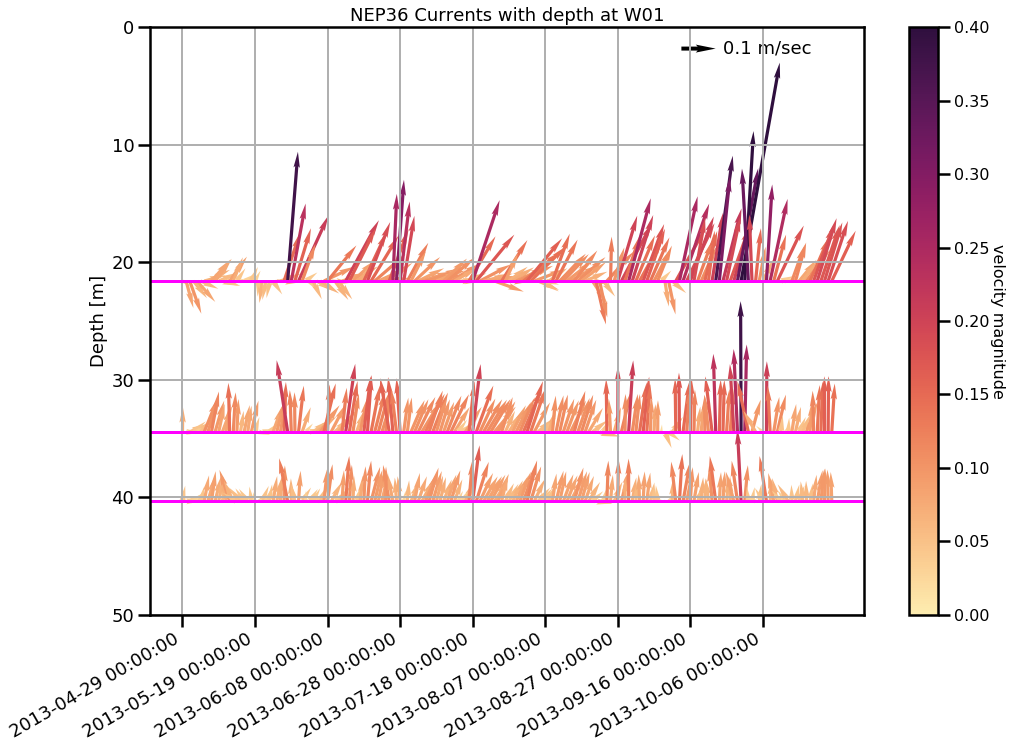

In [77]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)

time_axis_quiver = np.arange(0,180,step)




# time_axis = datetime_A1[:2420]
# time_tick = time_axis[::step]
# time_axis_quiver = np.arange(0,2420,step)



fig, ax = plt.subplots(1, 1, figsize=(16,12))

# ax.quiver(time_axis_quiver, zlevels[10], v_tzyx[:,10,j,i], u_tzyx[:,10,j,i], mag_vel[:,10,j,i], angles='uv', scale_units='inches')
# ax.axhline(y=zlevels[10], color='magenta', label = '{0} m'.format(zlevels[10]))

ax.quiver(time_axis_quiver, zlevels[16],u_unrotated[:,16,j,i], v_unrotated[:,16,j,i], mag_vel[:,16,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
ax.axhline(y=zlevels[16], color='magenta', label = '{0} m'.format(zlevels[16]))

ax.quiver(time_axis_quiver, zlevels[15], u_unrotated[:,15,j,i], v_unrotated[:,15,j,i], mag_vel[:,15,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
ax.axhline(y=zlevels[15], color='magenta', label = '{0} m'.format(zlevels[15]))

ax.quiver(time_axis_quiver, zlevels[12],  u_unrotated[:,12,j,i], v_unrotated[:,12,j,i], mag_vel[:,12,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
ax.axhline(y=zlevels[12], color='magenta', label = '{0} m'.format(zlevels[12]))

# ax.quiver(time_axis_quiver, zlevels[24], u_unrotated[:,24,j,i], v_unrotated[:,24,j,i], mag_vel[:,24,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
# ax.axhline(y=zlevels[24], color='magenta', label = '{0} m'.format(zlevels[23]))

# ax.quiver(time_axis_quiver, zlevels[25], u_unrotated[:,25,j,i], v_unrotated[:,25,j,i],  mag_vel[:,25,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
# ax.axhline(y=zlevels[25], color='magenta', label = '{0} m'.format(zlevels[25]))

# Q = ax.quiver(time_axis_quiver, zlevels[26], u_unrotated[:,26,j,i], v_unrotated[:,26,j,i],  mag_vel[:,26,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
# ax.axhline(y=zlevels[26], color='magenta', label = '{0} m'.format(zlevels[26]))

# Q = ax.quiver(time_axis_quiver, zlevels[27],u_unrotated[:,27,j,i], v_unrotated[:,27,j,i],  mag_vel[:,27,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
# ax.axhline(y=zlevels[27], color='magenta', label = '{0} m'.format(zlevels[27]))

# Q = ax.quiver(time_axis_quiver, zlevels[28],u_unrotated[:,28,j,i], v_unrotated[:,28,j,i],  mag_vel[:,28,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
# ax.axhline(y=zlevels[28], color='magenta', label = '{0} m'.format(zlevels[28]))

# ax.quiver(time_axis_quiver, 84.44, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=84.44, color='magenta', label = '84 m')

# ax.quiver(time_axis_quiver, 148.44, vel_east_148[::step], vel_north_148[::step], mag_148[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=148.44, color='red', label = '148 m')

# ax.quiver(time_axis_quiver, 196.44, vel_east_196[::step], vel_north_196[::step], mag_196[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=196.44, color='orangered', label = '196 m')

# ax.quiver(time_axis_quiver, 260.44, vel_east_260[::step], vel_north_260[::step], mag_260[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=260.44, color='cyan', label = '196 m')

# ax.quiver(time_axis_quiver, 228.44, vel_east_228[::step], vel_north_228[::step], mag_228[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=228.44, color='purple', label = '228 m')


ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::20], mydates[::20], fontsize =16)
# ax.format_xdata = DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# hfmt = DateFormatter('%Y-%m-%d-%H:%M:%S')
# ax.xaxis.set_major_formatter(hfmt)
# ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(0, 50)
ax.invert_yaxis()
ax.set_title('NEP36 Currents with depth at W01', fontsize =18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 
ax.quiverkey(Q, 0.6, 0.6, 0.1, r'0.1 m/sec', labelpos='E', fontproperties={'size': 18})

cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('velocity magnitude', rotation=270, fontsize = 16, labelpad =16)
ax.tick_params(axis='both',labelsize =18)

In [79]:
np.mean(mag_vel[:,13,j,i])

0.1265739513420602

In [80]:
lon_W02 = -124.89500
lat_W02 = 48.04167

j, i = geo_tools.find_closest_model_point(lon_W02,lat_W02,\
                                          lon_spic_file,lat_spic_file,grid='NEMO',tols=\
                                          {'NEMO': {'tol_lon': 0.1, 'tol_lat': 0.1},\
                                           'GEM2.5': {'tol_lon': 0.1, 'tol_lat': 0.1}}) 

print(j,i)

59 142


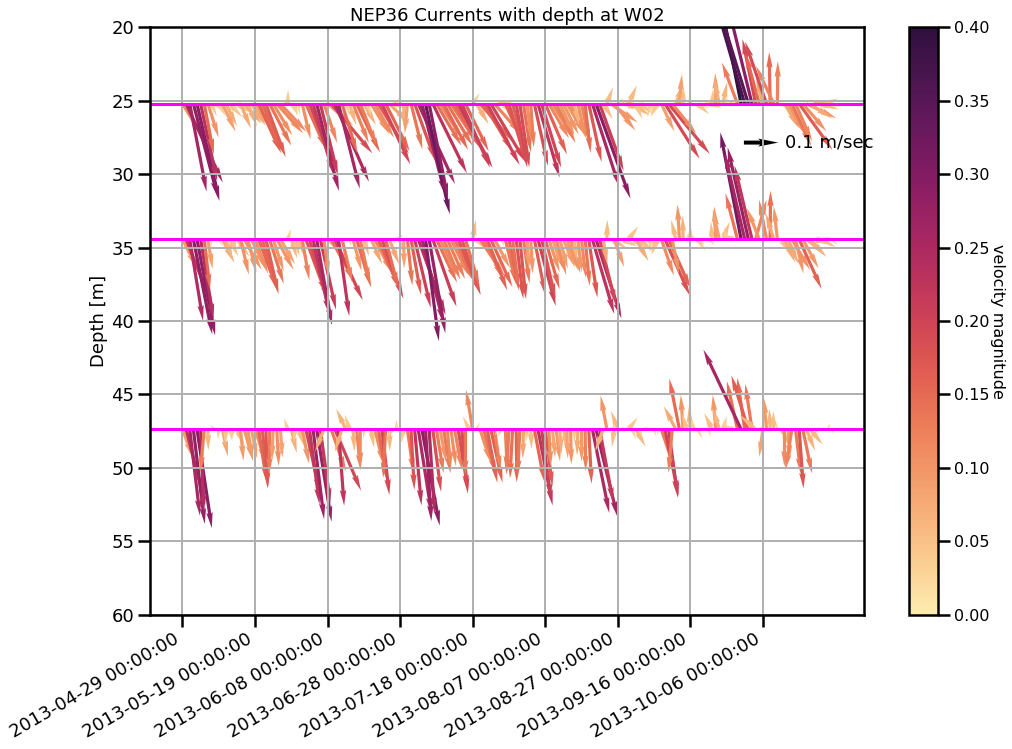

In [81]:
step = 1

# u_84 = vel_east_84[:4320]
# v_84 = vel_north_84[:4320]
# mag_84 = np.sqrt(u_84**2,v_84**2)

time_axis_quiver = np.arange(0,180,step)




# time_axis = datetime_A1[:2420]
# time_tick = time_axis[::step]
# time_axis_quiver = np.arange(0,2420,step)



fig, ax = plt.subplots(1, 1, figsize=(16,12))

# ax.quiver(time_axis_quiver, zlevels[10], v_tzyx[:,10,j,i], u_tzyx[:,10,j,i], mag_vel[:,10,j,i], angles='uv', scale_units='inches')
# ax.axhline(y=zlevels[10], color='magenta', label = '{0} m'.format(zlevels[10]))

ax.quiver(time_axis_quiver, zlevels[13],u_unrotated[:,13,j,i], v_unrotated[:,13,j,i], mag_vel[:,13,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
ax.axhline(y=zlevels[13], color='magenta', label = '{0} m'.format(zlevels[13]))

ax.quiver(time_axis_quiver, zlevels[15], u_unrotated[:,15,j,i], v_unrotated[:,15,j,i], mag_vel[:,15,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
ax.axhline(y=zlevels[15], color='magenta', label = '{0} m'.format(zlevels[15]))

ax.quiver(time_axis_quiver, zlevels[17],  u_unrotated[:,17,j,i], v_unrotated[:,17,j,i], mag_vel[:,17,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
ax.axhline(y=zlevels[17], color='magenta', label = '{0} m'.format(zlevels[17]))

# ax.quiver(time_axis_quiver, zlevels[24], u_unrotated[:,24,j,i], v_unrotated[:,24,j,i], mag_vel[:,24,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
# ax.axhline(y=zlevels[24], color='magenta', label = '{0} m'.format(zlevels[23]))

# ax.quiver(time_axis_quiver, zlevels[25], u_unrotated[:,25,j,i], v_unrotated[:,25,j,i],  mag_vel[:,25,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
# ax.axhline(y=zlevels[25], color='magenta', label = '{0} m'.format(zlevels[25]))

# Q = ax.quiver(time_axis_quiver, zlevels[26], u_unrotated[:,26,j,i], v_unrotated[:,26,j,i],  mag_vel[:,26,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
# ax.axhline(y=zlevels[26], color='magenta', label = '{0} m'.format(zlevels[26]))

# Q = ax.quiver(time_axis_quiver, zlevels[27],u_unrotated[:,27,j,i], v_unrotated[:,27,j,i],  mag_vel[:,27,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
# ax.axhline(y=zlevels[27], color='magenta', label = '{0} m'.format(zlevels[27]))

# Q = ax.quiver(time_axis_quiver, zlevels[28],u_unrotated[:,28,j,i], v_unrotated[:,28,j,i],  mag_vel[:,28,j,i], angles='uv',cmap = cm, norm = norm, scale_units='inches', scale = 0.21, headwidth = 2, headlength = 5)#, scale_units='inches')
# ax.axhline(y=zlevels[28], color='magenta', label = '{0} m'.format(zlevels[28]))

# ax.quiver(time_axis_quiver, 84.44, vel_east_84[::step], vel_north_84[::step], mag_84[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=84.44, color='magenta', label = '84 m')

# ax.quiver(time_axis_quiver, 148.44, vel_east_148[::step], vel_north_148[::step], mag_148[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=148.44, color='red', label = '148 m')

# ax.quiver(time_axis_quiver, 196.44, vel_east_196[::step], vel_north_196[::step], mag_196[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=196.44, color='orangered', label = '196 m')

# ax.quiver(time_axis_quiver, 260.44, vel_east_260[::step], vel_north_260[::step], mag_260[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=260.44, color='cyan', label = '196 m')

# ax.quiver(time_axis_quiver, 228.44, vel_east_228[::step], vel_north_228[::step], mag_228[::step], angles='uv', scale_units='inches', scale=0.5)# , minshaft = 3)
# ax.axhline(y=228.44, color='purple', label = '228 m')


ax.set_ylabel('Depth [m]', fontsize =18)
plt.xticks(time_axis_quiver[::20], mydates[::20], fontsize =16)
# ax.format_xdata = DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# hfmt = DateFormatter('%Y-%m-%d-%H:%M:%S')
# ax.xaxis.set_major_formatter(hfmt)
# ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
ax.set_ylim(20, 60)
ax.invert_yaxis()
ax.set_title('NEP36 Currents with depth at W02', fontsize =18)
# legend = ax.legend(loc='best', fancybox=True, framealpha=0.75, fontsize = 18)
ax.grid() 
ax.quiverkey(Q, 0.67, 0.48, 0.1, r'0.1 m/sec', labelpos='E', fontproperties={'size': 18})

cbar = plt.colorbar(sm)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('velocity magnitude', rotation=270, fontsize = 16, labelpad =16)
ax.tick_params(axis='both',labelsize =18)

In [82]:
np.mean(mag_vel[:,17,j,i])

0.10284530689284102

In [47]:
mag_vel[:,18,j,i]

array([ 0.03049154,  0.10359335,  0.11858183,  0.12252234,  0.13279647,
        0.10480598,  0.06069661,  0.02262582,  0.01563825,  0.01500543,
        0.01556308,  0.03893668,  0.01761956,  0.00804549,  0.00702445,
        0.02822149,  0.04438938,  0.04290448,  0.04601371,  0.03954134,
        0.05041627,  0.07586168,  0.0775194 ,  0.07840049,  0.05411046,
        0.03267692,  0.04100785,  0.03088329,  0.01677799,  0.02574402,
        0.02642252,  0.00941708,  0.00922265,  0.04692139,  0.09055422,
        0.11122318,  0.12475764,  0.13395215,  0.09808782,  0.02341847,
        0.0141636 ,  0.05089698,  0.11496059,  0.10651128,  0.03065618,
        0.05607975,  0.02464399,  0.031164  ,  0.06142477,  0.05768315,
        0.01548164,  0.01370137,  0.0105543 ,  0.03648885,  0.05512496,
        0.07205559,  0.05542281,  0.02169179,  0.01347683,  0.01063318,
        0.00727667,  0.00587948,  0.04497948,  0.07272131,  0.0896566 ,
        0.11853163,  0.13164931,  0.12990328,  0.09153649,  0.07